<a href="https://colab.research.google.com/github/VandyALV23/ALVIGPFIRST/blob/main/ALV%20Updated%20HW4%20notes%20notebooks2025/section04_DataQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/notebooks2025/section04_DataQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook go through steps to generate ambient contamination metric plots to check the quality of a scRNA-seq dataset

## Preparation Steps
### 1. Install required packages

In [1]:
! pip install matplotlib==3.7.5
#==3.6.2

#Class notes
#evaluate the distribution of counts across all datas
#ideally, you see a bimodal distribution (real cells and empty droplets with random # of transcripts)
#all "empty droplets" should have very low transcript #s (single digits), use this to gauge the quality of the data.
#check UMAP of "total transcript count"
#check UMAP of "total gene count"
#review week 4 powerpoint steps to filter slide.

#raw data term means data set (like anndata set) that can contain both raw counts and processed counts. Raw counts are the reads before normalation/processing steps.
# origins of low quality data/contamination:
#dying/lysed cells
#extracellular vesicles with DNA
#circulating DNA
#duplicates/triplets

#3 enssential files for RNA-seq data: the count matrix, a list of barcodes and a list of gene names (feature)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.


In [2]:
! pip install scanpy==1.10.1
! pip install pandas==2.2.2
! pip install numpy==1.26.4

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=f31d149f9b122319f1b3b2f1d3dccb0ef3f2d5334533624b2a4513394e00648c
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [3]:
!pip install setuptools==65.5.0 wheel==0.38.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.45.1
    Uninstalling wheel-0.45.1:
      Successfully uninstalled wheel-0.45.1
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [4]:
!pip install dropkick==1.2.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dropkick: filename=dropkick-1.2.8-cp311-cp311-linux_x86_64.whl size=690749 sha256=e2c7b19fae1deb92d22ed2bdfdf5bd3443271221647b97c51f4d2112d7696523
  Stored in directory: /root/.cache/pip/wheels/3f/7d/ca/6209590673742fe6b683fdcfd34358870c1aade312bbc91c29
Successfully built dropkick


In [5]:
!pip install POT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 13.2 MB/s eta 0:00:00


clone the github that has codes for ambient contamination analysis

In [6]:
! git clone https://github.com/Ken-Lau-Lab/AmbiQuant.git

Cloning into 'AmbiQuant'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 97 (delta 47), reused 72 (delta 27), pack-reused 0 (from 0)
Receiving objects: 100% (97/97), 3.03 MiB | 8.98 MiB/s, done.
Resolving deltas: 100% (47/47), done.


### 2. Import packages

In [1]:
import scanpy as sc

/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr

In [3]:
import sys
import numpy as np
import pandas as pd

In [4]:
from matplotlib import pyplot as plt

In [11]:
import dropkick as dk

AttributeError: module 'matplotlib._docstring' has no attribute 'dedent_interpd'

At this point, if dropkick cannot be imported, uncomment the next cell and run it. Then, <font color='red'>restart runtime</font> after installing. Run all the <font color='#b225f6'>import</font> cells after restart the runtime

In [12]:
! pip install matplotlib

In [5]:
sys.path.append("./AmbiQuant/")
sys.path.append("./AmbiQuant/QCPipe_dir/")
#add the path of the contamination python files to the notebook's search path so that they can be imported

In [6]:
import quality_control_function as qc_functions
import plot_quality_score as qc_plts
import QCPipe

### 3. Download data files

In [45]:
! mkdir ALVHW4_A
# this line created a folder '7017_YX_1' in the current working directory

In [28]:
cd ALVHW4

/content/ALVHW4


In [46]:
! curl -O -J -L https://www.dropbox.com/scl/fo/mbxe9nfe0kmd432b65p2n/AGr8xth-08yYwzcdEnX_Dcs?rlkey=03r5iwlxlgpv1waxkwso9hxkc&st=0cemb5n8&dl=0
# download data from the url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     11      0  0:00:01  0:00:01 --:--:--    11
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
curl: (23) Failed writing header


In [47]:
! unzip dataset_A.zip -d ALVHW4_A

Archive:  dataset_A.zip
mapname:  conversion of  failed
 extracting: ALVHW4_A/dat_A_counts.mtx  
 extracting: ALVHW4_A/dat_A_barcodes.txt  
 extracting: ALVHW4_A/dat_A_features.txt  


In [48]:
! mkdir ALVHW4_B

In [50]:
! curl -O -J -L https://www.dropbox.com/scl/fo/fy052zrkfescrv0py15s2/AMUCWx973SvHDgmQauHmhtA?rlkey=4lzdk56xt72p3tx5xd8shqco7&st=wl0zxmlg&dl=0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     19      0 --:--:-- --:--:-- --:--:--    19
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
curl: (23) Failed writing header


In [51]:
! unzip dataset_B.zip -d ALVHW4_B

Archive:  dataset_B.zip
mapname:  conversion of  failed
 extracting: ALVHW4_B/dat_B_counts.mtx  
 extracting: ALVHW4_B/dat_B_barcodes.txt  
 extracting: ALVHW4_B/dat_B_features.txt  


In [52]:
! mkdir ALVHW4_C

In [53]:
! curl -O -J -L https://www.dropbox.com/scl/fo/4piv8a1f8nefi4v3ldlui/ABCFkwMpJn7ZNzxUOiKBH2s?rlkey=fhg3c8bdiziib7lqdks33mjuk&st=4uer8221&dl=0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     18      0 --:--:-- --:--:-- --:--:--    18
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
curl: (23) Failed writing header


In [54]:
! unzip dataset_C.zip -d ALVHW4_C

Archive:  dataset_C.zip
mapname:  conversion of  failed
 extracting: ALVHW4_C/dat_C_counts.mtx  
 extracting: ALVHW4_C/dat_C_barcodes.txt  
 extracting: ALVHW4_C/dat_C_features.txt  


Archive:  dataset_A.zip
mapname:  conversion of  failed
 extracting: ALVHW4/dat_A_counts.mtx  
 extracting: ALVHW4/dat_A_barcodes.txt  
 extracting: ALVHW4/dat_A_features.txt  


note the 3 enssential files for RNA-seq data: the count matrix, a list of barcodes and a list of gene names (feature)

cd


## Generating metric plots
### 1. Read data into an anndata object and cut to 10,000 barcodes

Calculating QC Metrics


/content/./AmbiQuant/QCPipe_dir/qc_utils.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  secant_coef=data_cumsum[adata_in.obs.shape[0]-1]/adata_in.obs.shape[0]
/content/./AmbiQuant/QCPipe_dir/qc_utils.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inflection_percentiles_inds = np.percentile(x_vals[x_vals>inflection_points[0]],inflection_percentiles).astype(int)


Inflection point at [3401 5772 8143] for [0, 15, 30] percentiles of greatest secant distances
the original dataset has 19210 cells. Cut to 10000 cells


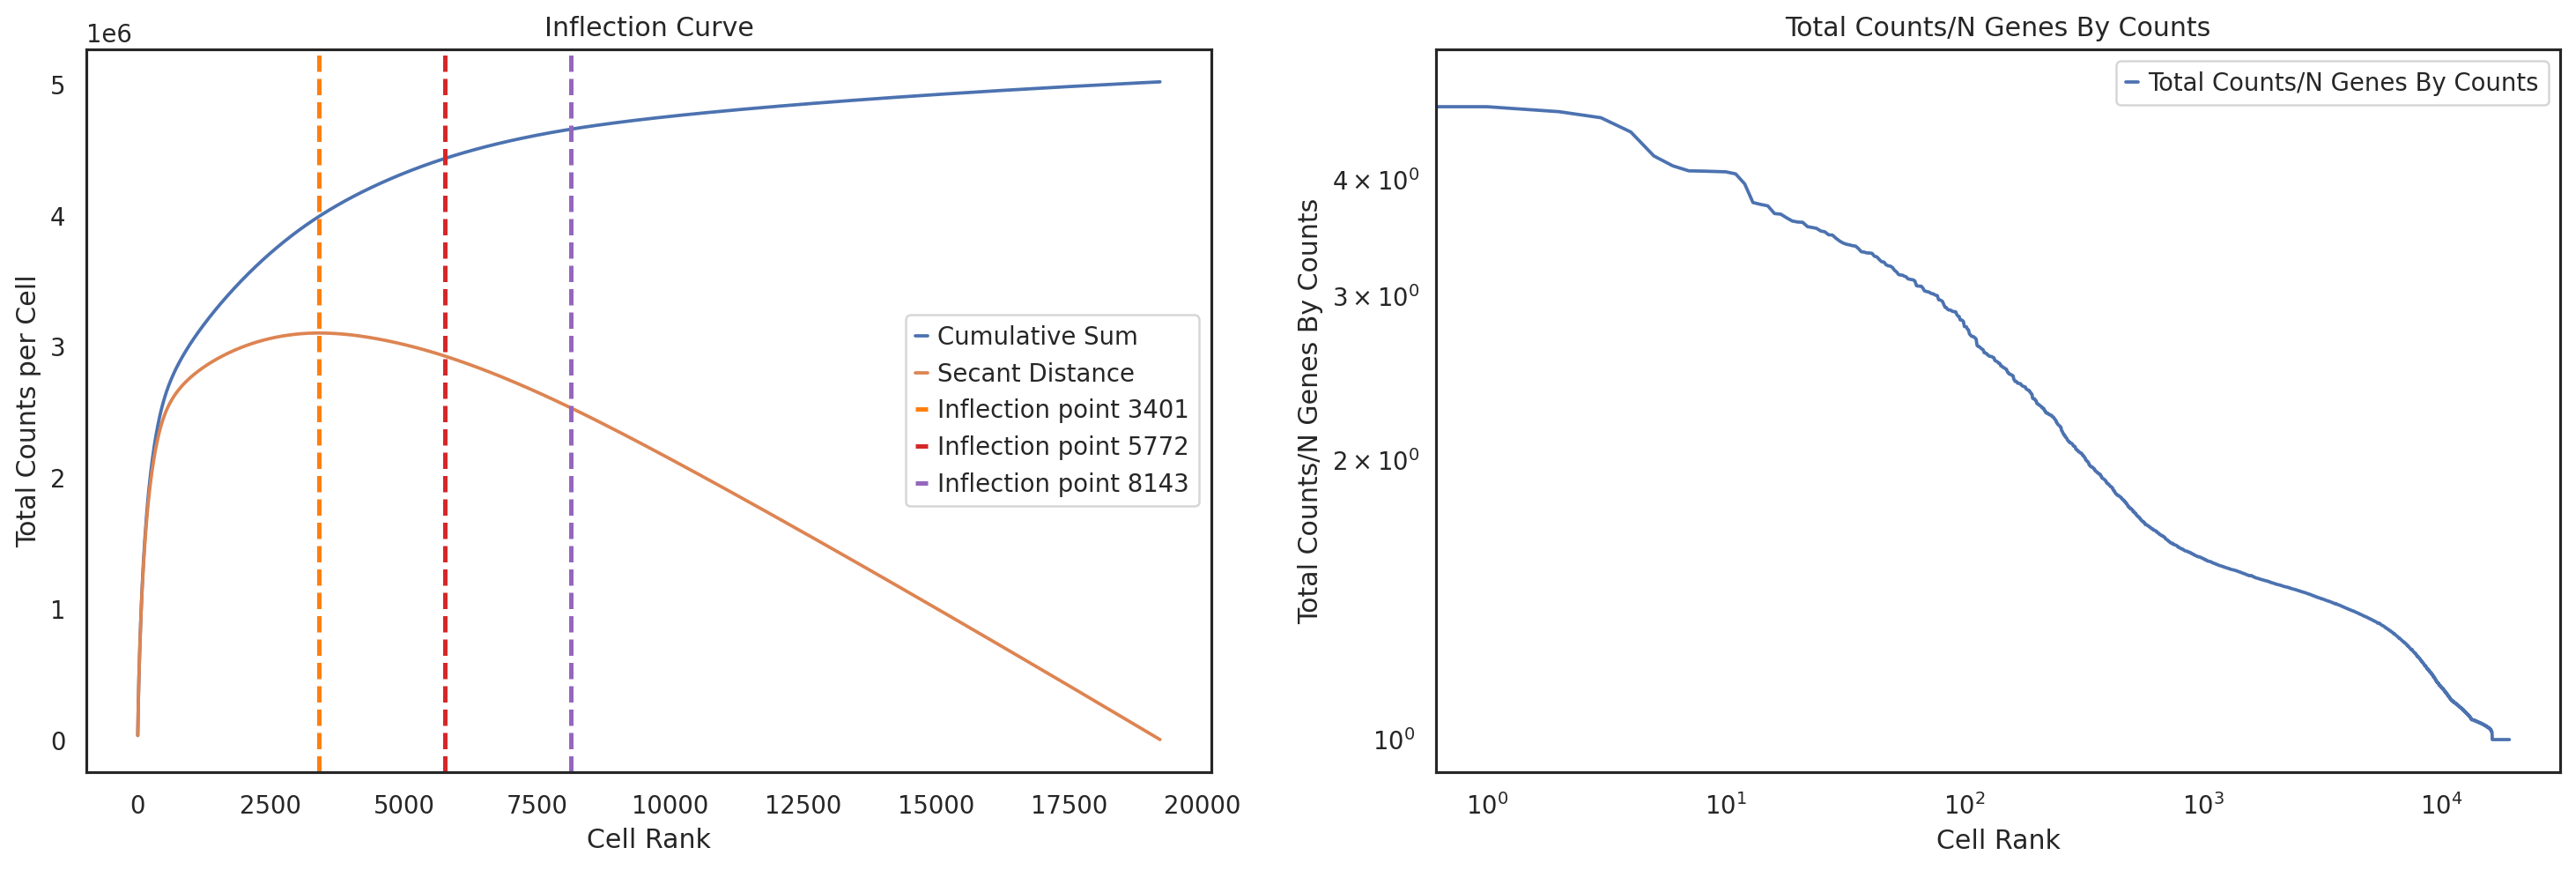

In [58]:
dat_A = qc_functions.cut_off_from_dropset( "./ALVHW4_A", gene_file_delim="\t", barcode_file_delim="\t", mito_tag="\t"  )
# the first parameter is the path name where the data files are stored
# the second and third param are specifiying delimiter used in the files (csv needs to use ',', tsv needs to use '\t' ... )
# more parameter specification can be found in the documentation


Calculating QC Metrics


/content/./AmbiQuant/QCPipe_dir/qc_utils.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  secant_coef=data_cumsum[adata_in.obs.shape[0]-1]/adata_in.obs.shape[0]
/content/./AmbiQuant/QCPipe_dir/qc_utils.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inflection_percentiles_inds = np.percentile(x_vals[x_vals>inflection_points[0]],inflection_percentiles).astype(int)


Inflection point at [ 7197 11558 15920] for [0, 15, 30] percentiles of greatest secant distances
the original dataset has 36277 cells. Cut to 10000 cells


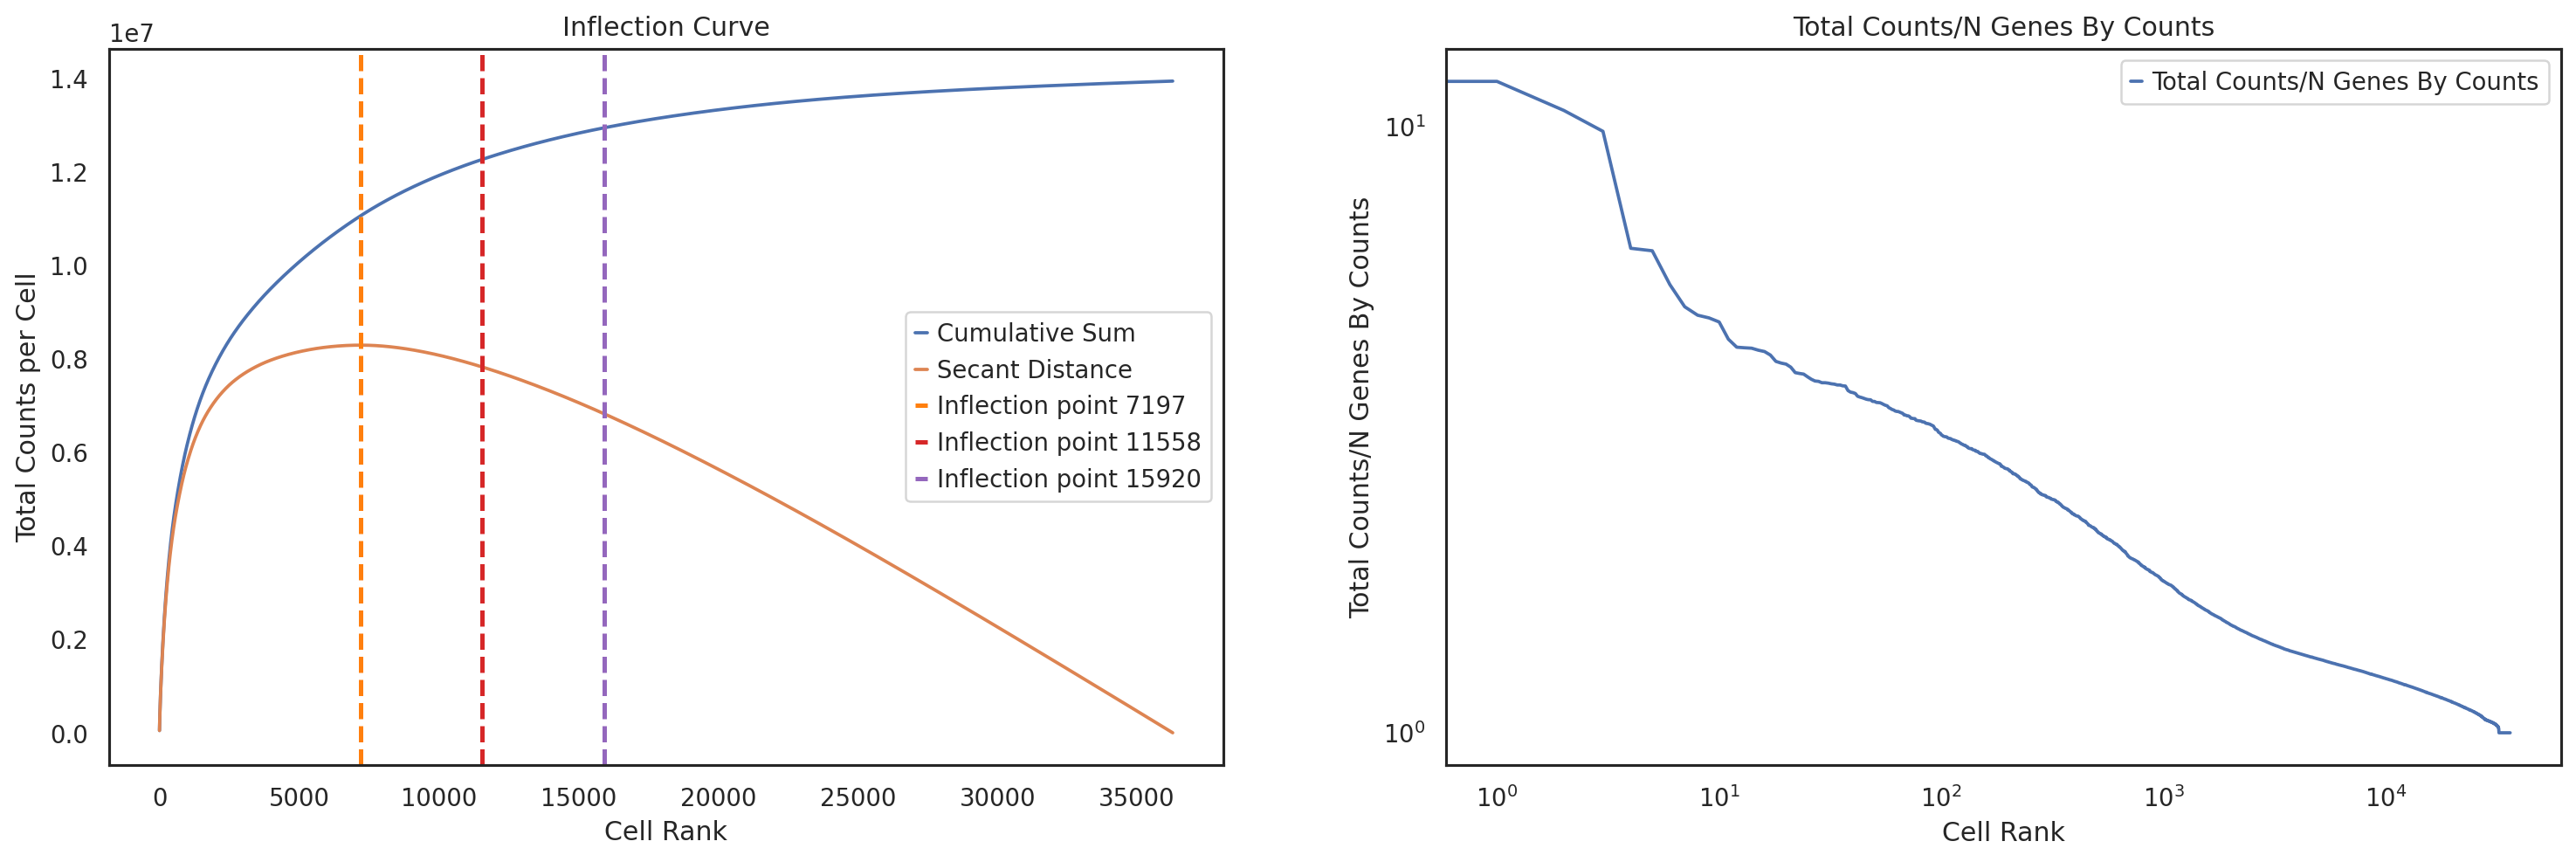

In [59]:
dat_B = qc_functions.cut_off_from_dropset( "./ALVHW4_B", gene_file_delim="\t", barcode_file_delim="\t", mito_tag="\t"  )


Calculating QC Metrics


/content/./AmbiQuant/QCPipe_dir/qc_utils.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  secant_coef=data_cumsum[adata_in.obs.shape[0]-1]/adata_in.obs.shape[0]
/content/./AmbiQuant/QCPipe_dir/qc_utils.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inflection_percentiles_inds = np.percentile(x_vals[x_vals>inflection_points[0]],inflection_percentiles).astype(int)


Inflection point at [14919 29571 44224] for [0, 15, 30] percentiles of greatest secant distances
the original dataset has 112606 cells. Cut to 10000 cells


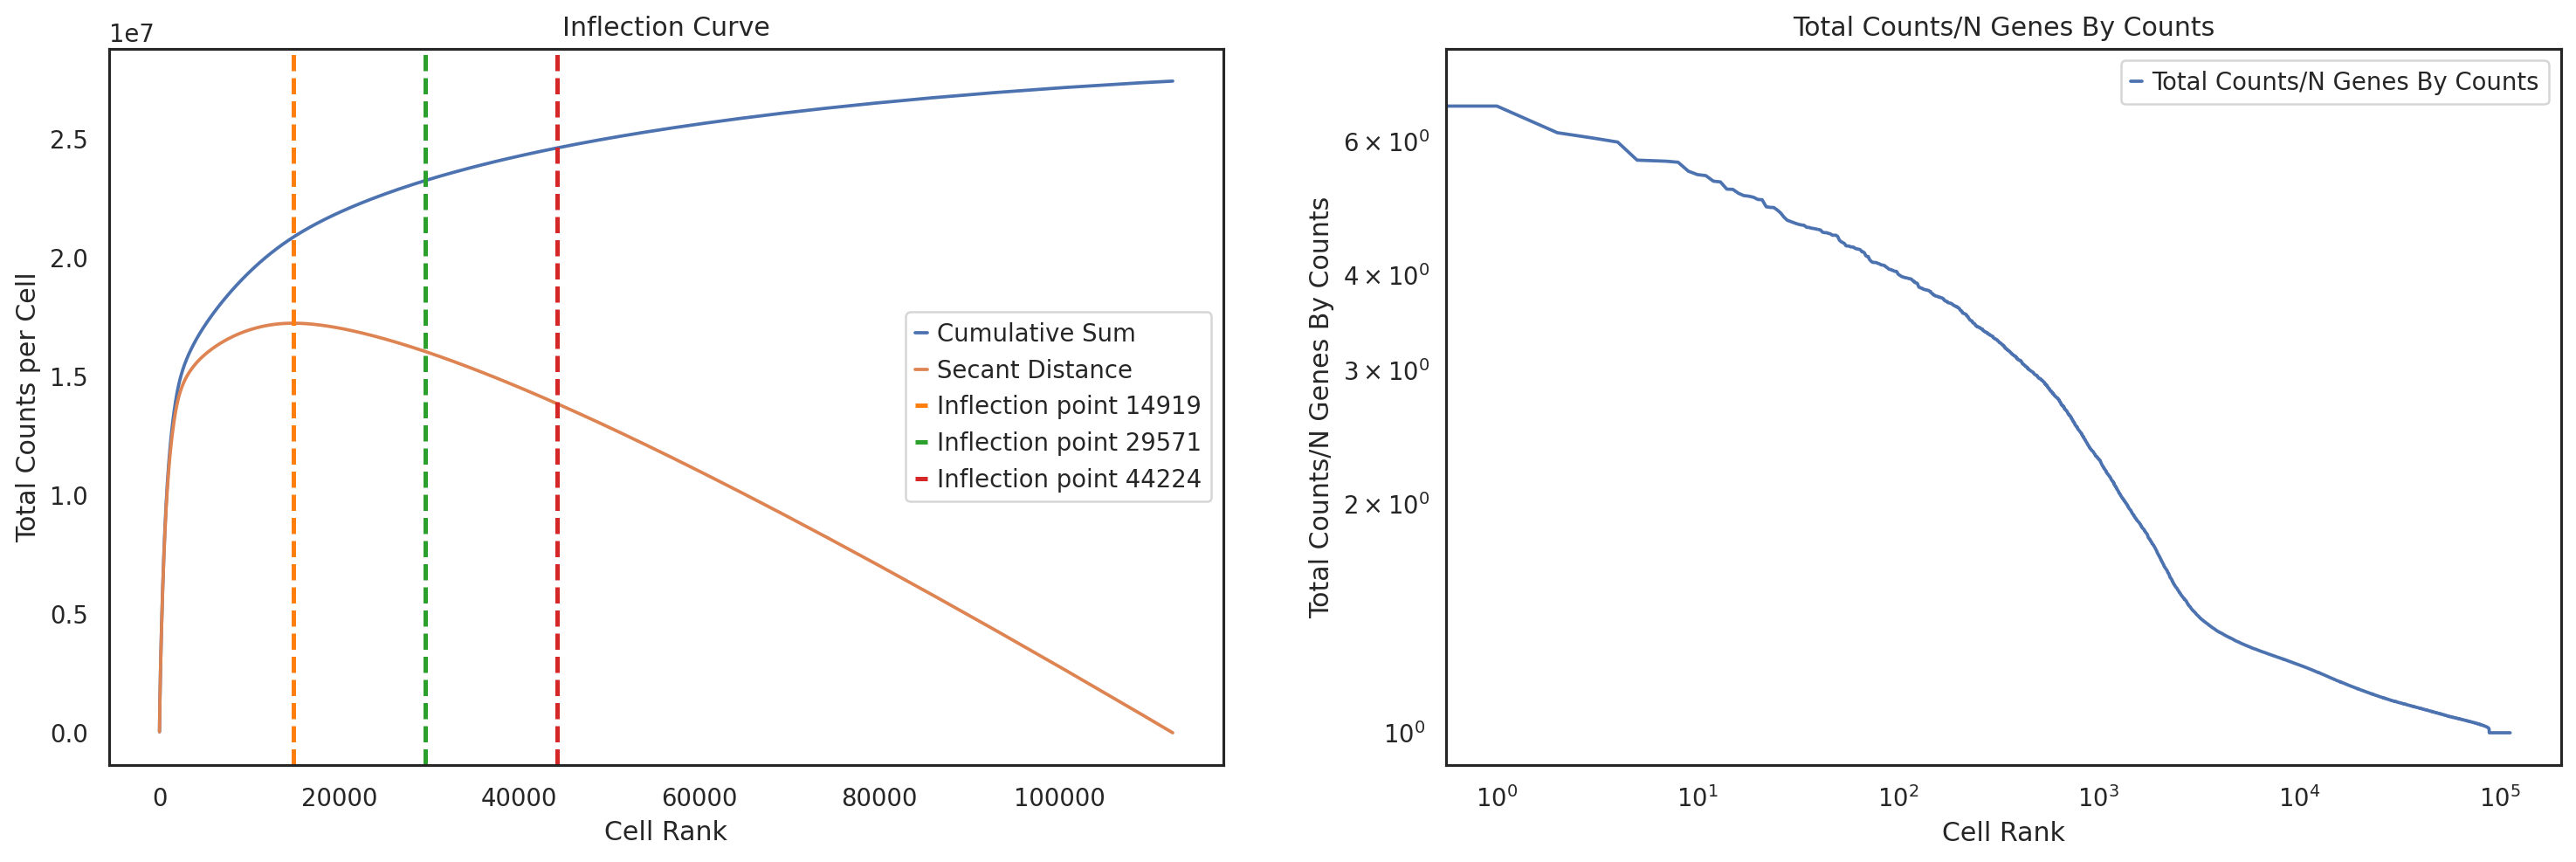

In [60]:
dat_C = qc_functions.cut_off_from_dropset( "./ALVHW4_C", gene_file_delim="\t", barcode_file_delim="\t", mito_tag="\t"  )


As I mentioned earlier, note there were 50,000 cells in the raw file initially, but most of them are empty droplets as you can see the plateau. Conventionally we keep 10,000 cells to proceed.

### 2. Generate the metric plots

Top 0 ambient genes have dropout rates between nan and nan percent:
	[]


/content/./AmbiQuant/quality_control_function.py:460: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata.var.pct_dropout_by_counts[


no ambient genes to be plotted
Overall score: 0.3797189917336309


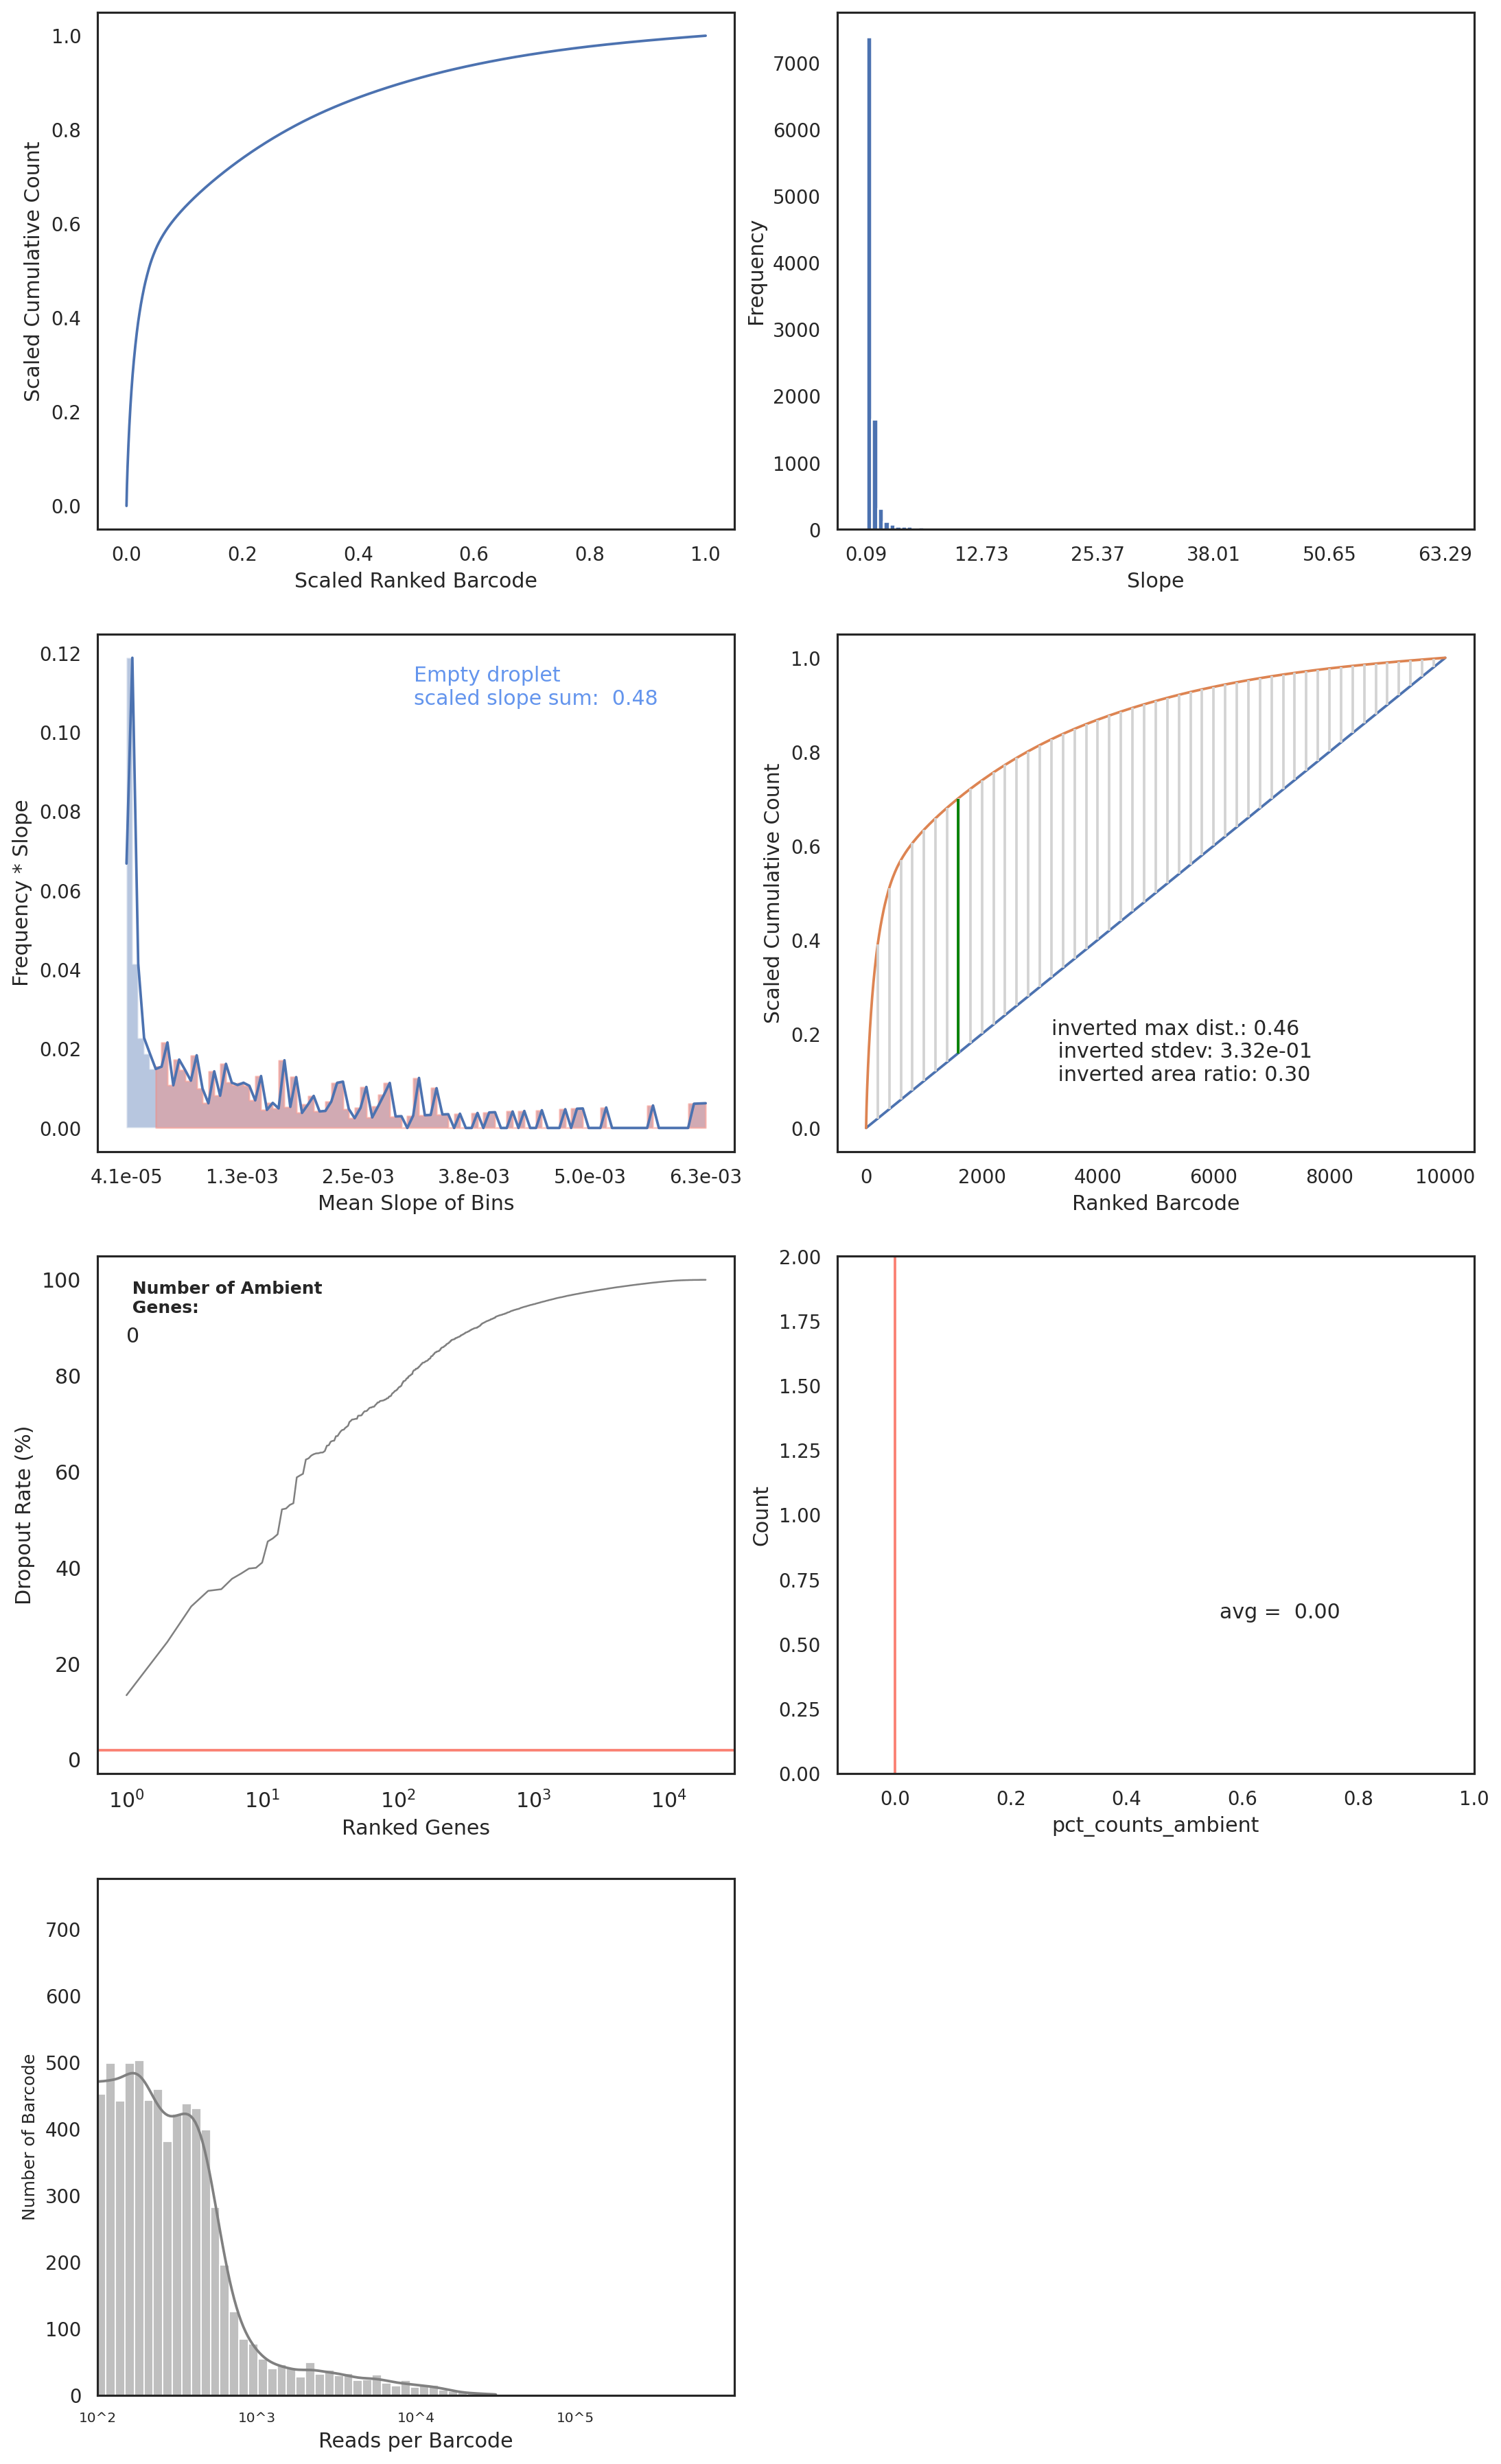

In [62]:
ret_A = qc_plts.formatted_figures_inverted(dat_A, ncols = 2, )

/content/./AmbiQuant/plot_quality_score.py:270: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  sample_dat.var["pct_dropout_by_counts"] = np.array(


Top 1 ambient genes have dropout rates between 0.59 and 0.59 percent:
	['Car1']


/content/./AmbiQuant/quality_control_function.py:460: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata.var.pct_dropout_by_counts[


Overall score: 0.4437302606059643


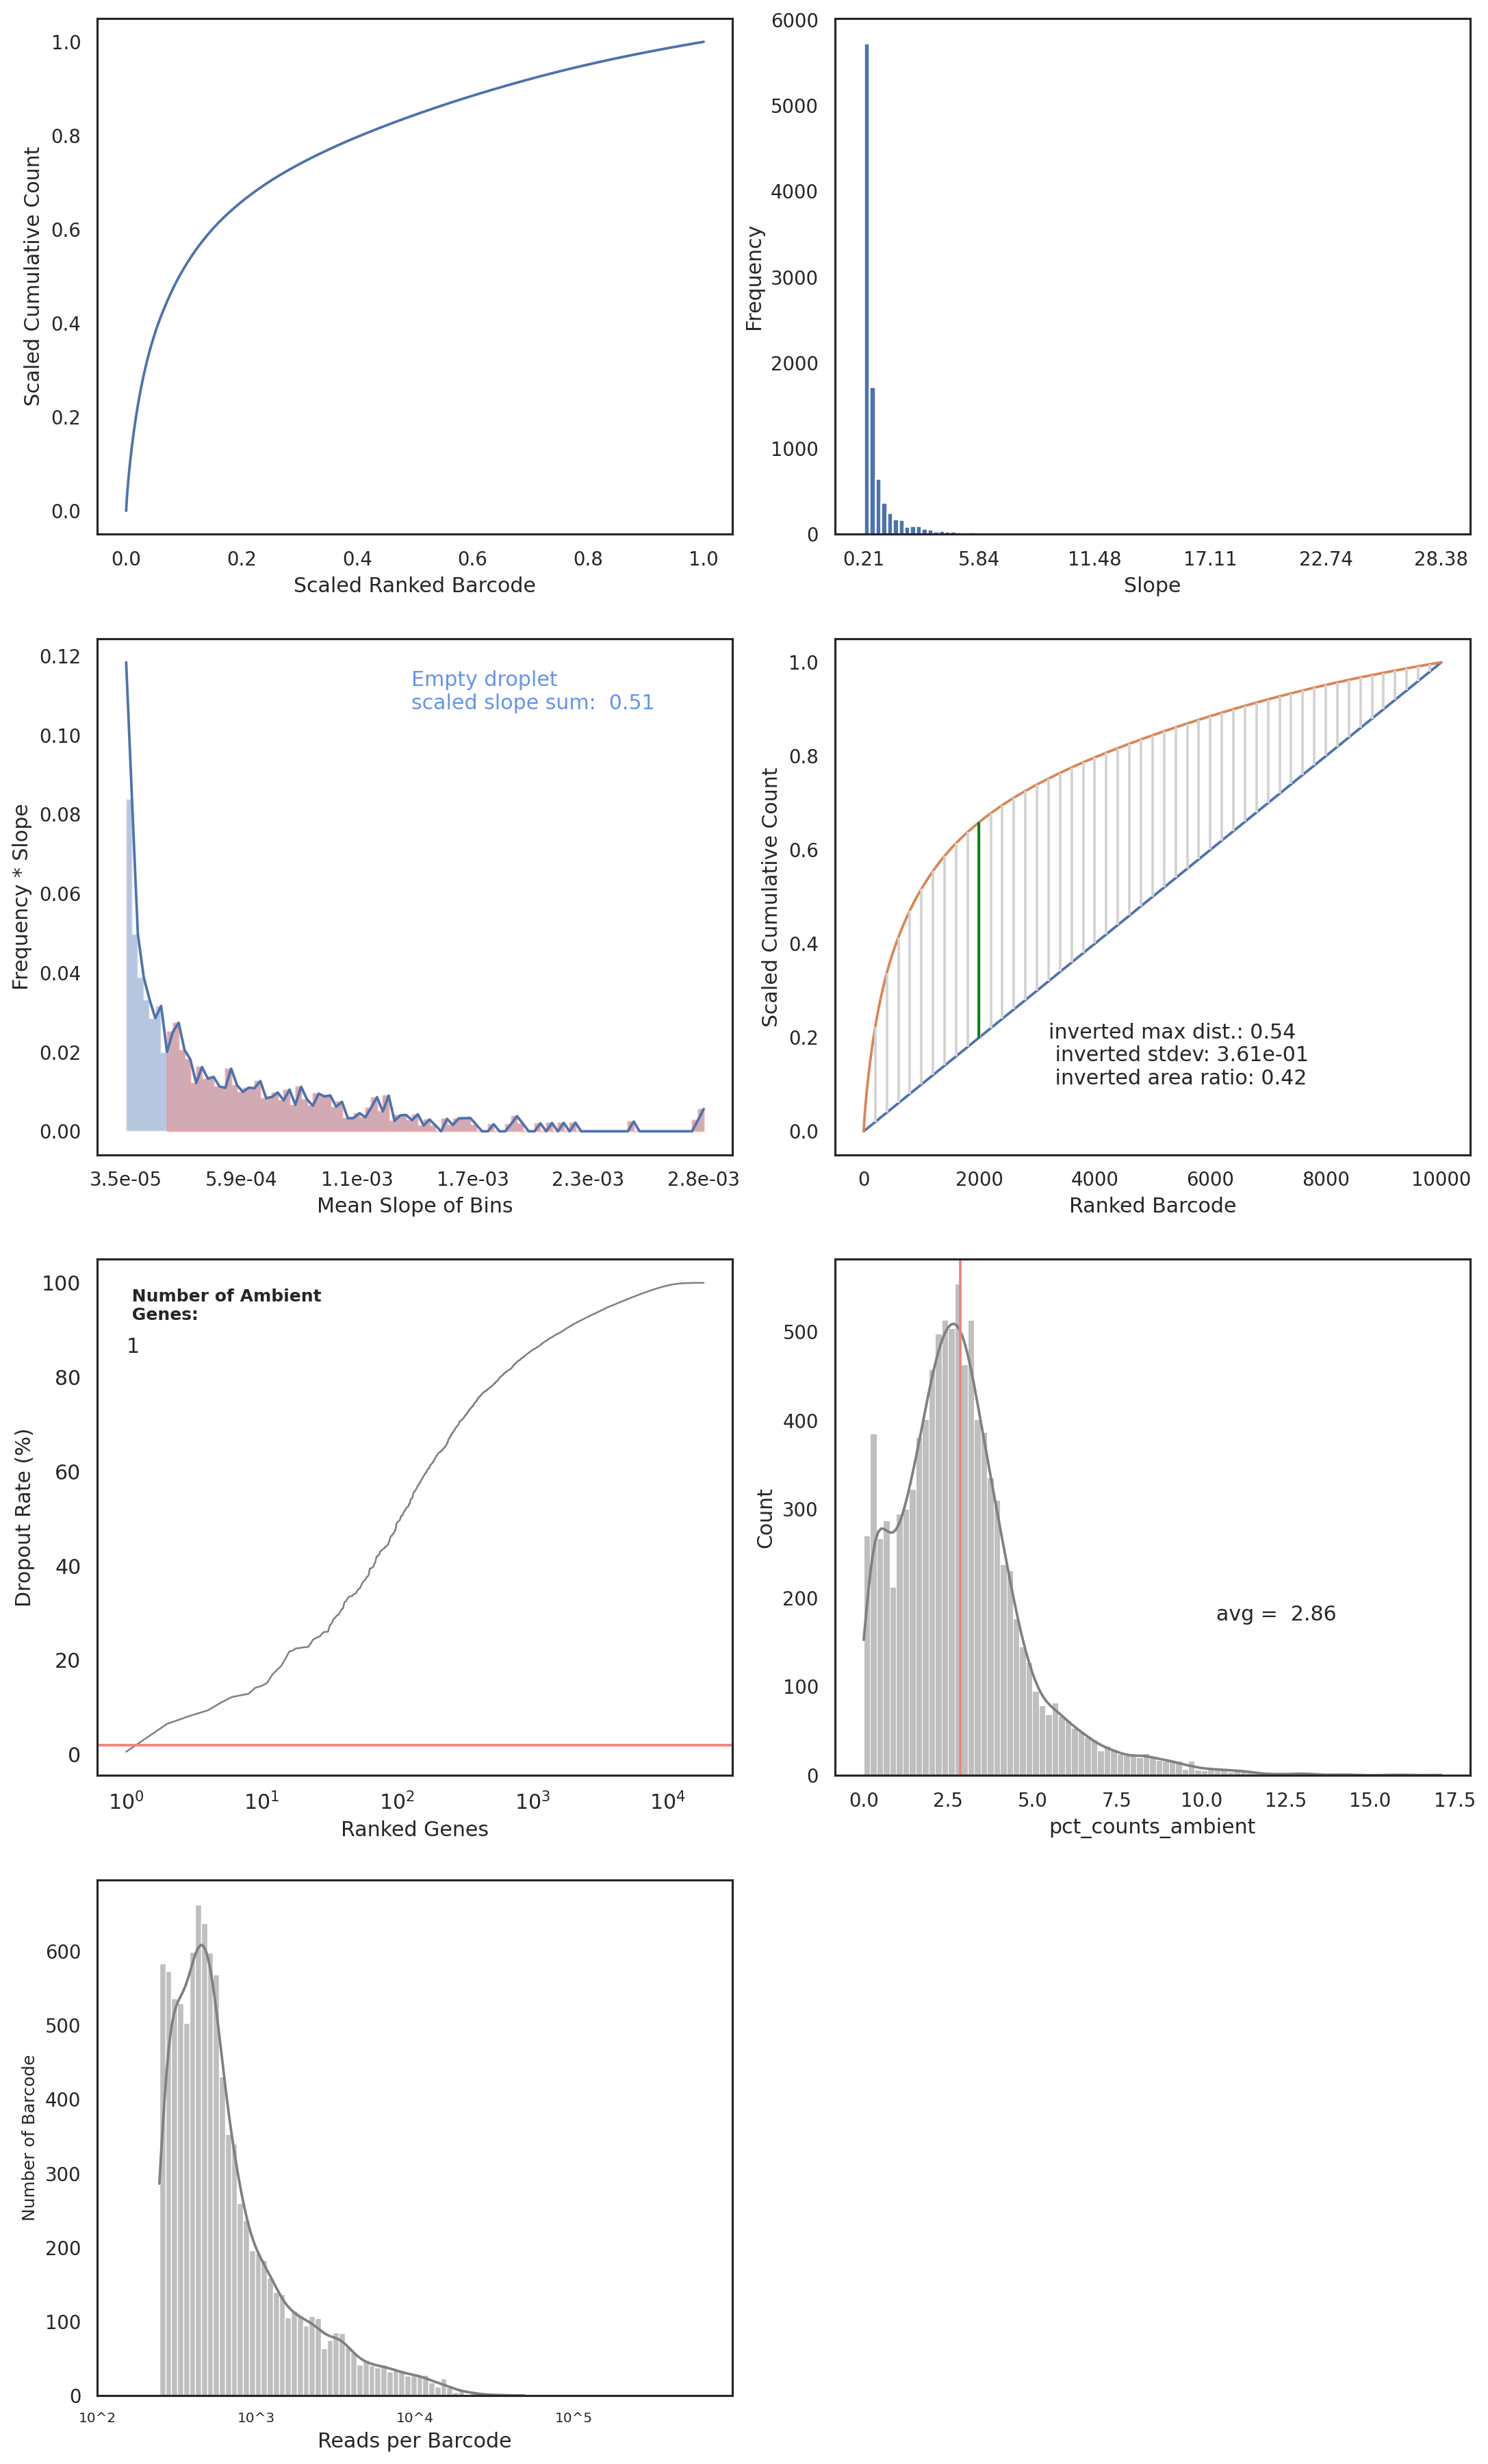

In [63]:
ret_B = qc_plts.formatted_figures_inverted(dat_B, ncols = 2, )

/content/./AmbiQuant/plot_quality_score.py:270: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  sample_dat.var["pct_dropout_by_counts"] = np.array(


Top 1 ambient genes have dropout rates between 1.93 and 1.93 percent:
	['Reg3b']


/content/./AmbiQuant/quality_control_function.py:460: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata.var.pct_dropout_by_counts[


Overall score: 0.3749826389344744


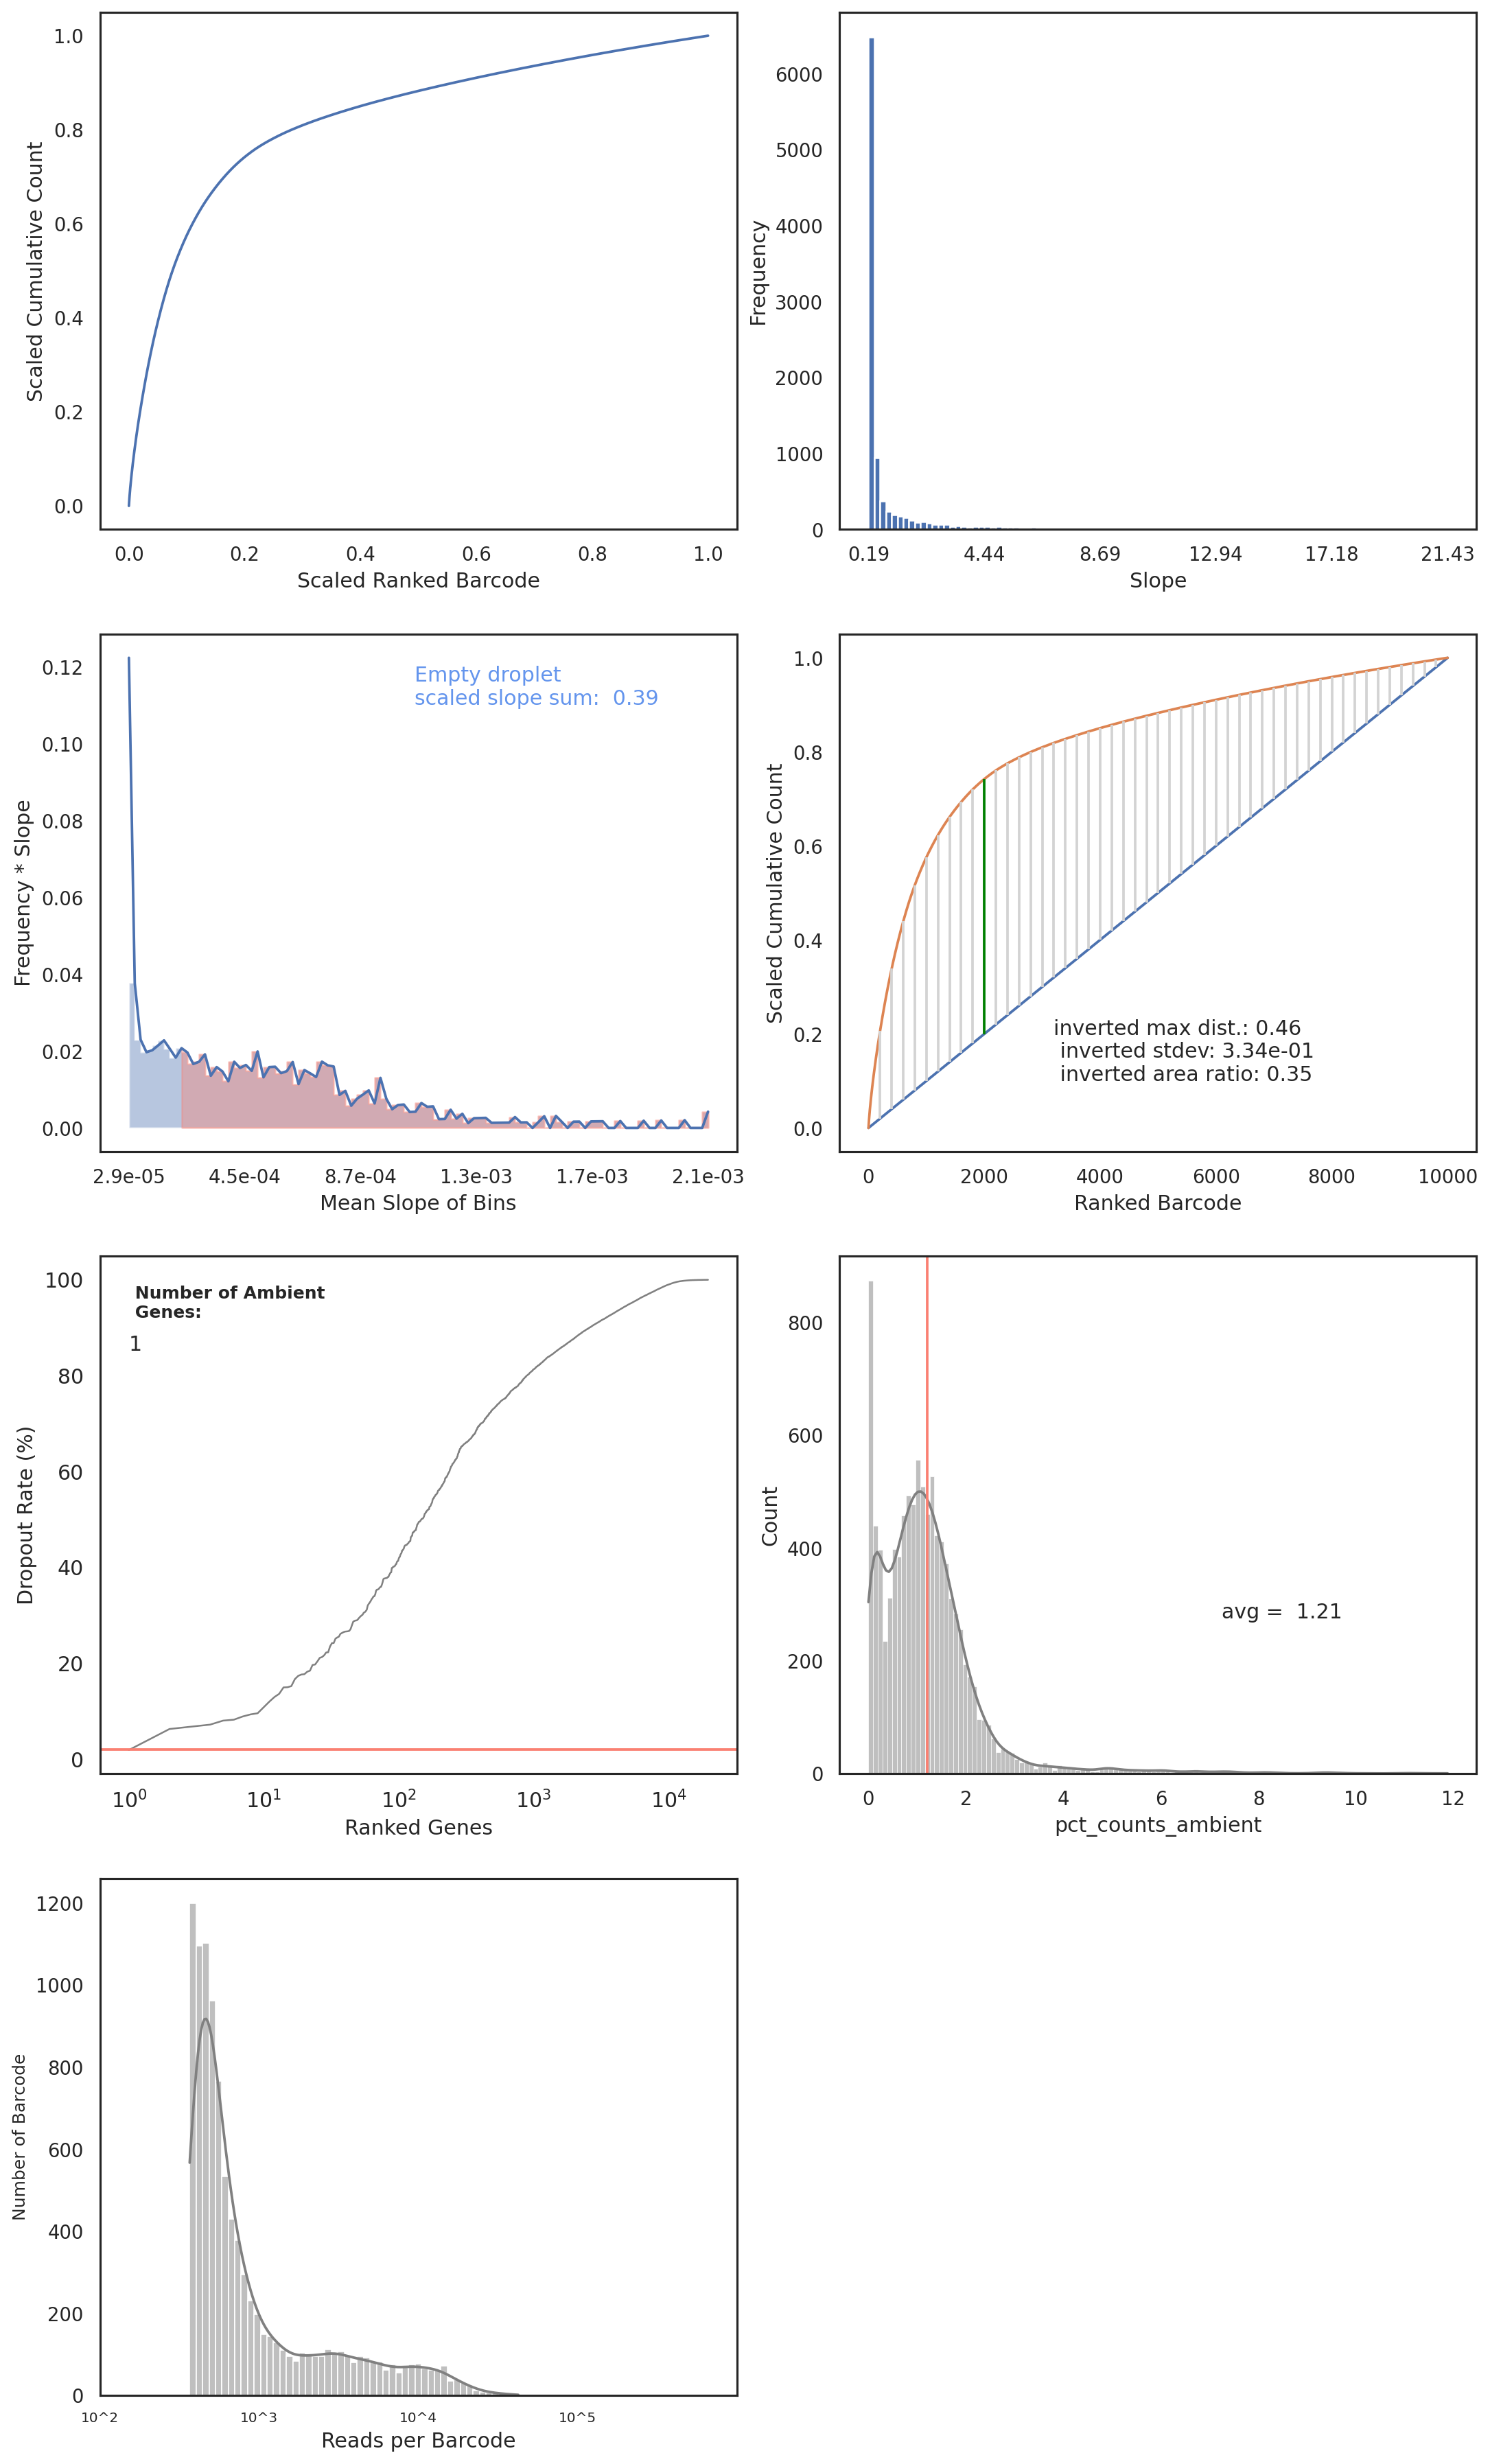

In [64]:
ret_C = qc_plts.formatted_figures_inverted(dat_C, ncols = 2, )

In [90]:
dat_A
#check information in this anndata object

AnnData object with n_obs × n_vars = 10000 × 18610
    obs: 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial'
    var: 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mito', 'ambient'
    uns: 'Order', 'inflection1', 'inflection_fold'
    layers: 'raw_counts'

In [91]:
dat_C

AnnData object with n_obs × n_vars = 10000 × 19659
    obs: 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial'
    var: 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mito', 'ambient'
    uns: 'Order', 'inflection1', 'inflection_fold'
    layers: 'raw_counts'

In [98]:
dat_AC

AnnData object with n_obs × n_vars = 20000 × 17866
    obs: 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'batch'
    var: 'Mitochondrial', 'mito', 'ambient', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1'
    layers: 'raw_counts'

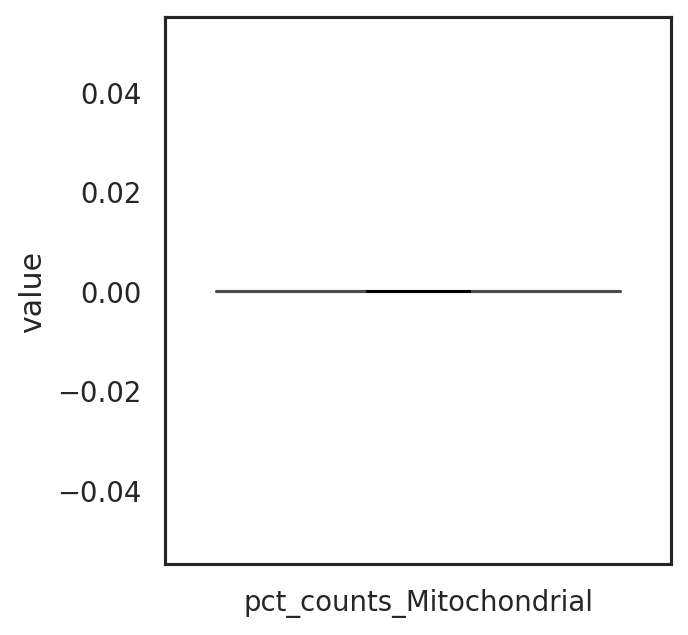

In [100]:
 sc.pl.violin(dat_B, "pct_counts_Mitochondrial")
 # Visualize one of the standard qc metrics with scanpy pl module functions

<Axes: >

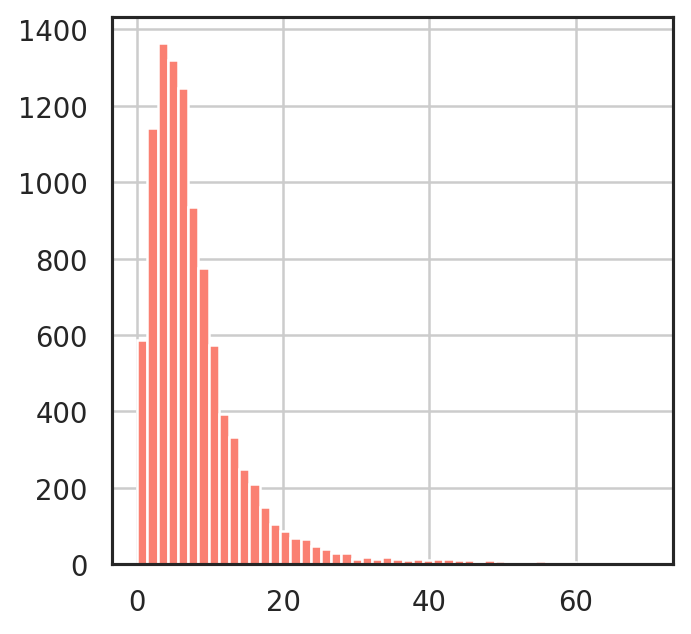

In [ ]:
dat.obs["pct_counts_Mitochondrial"].hist(bins = 50, color ='salmon')
# can also use matplotlib
# this hist() is a method called on the dataframe 'dat.obs["pct_counts_Mitochondrial"]', which is a subset of dat.obs dataframe

<Axes: >

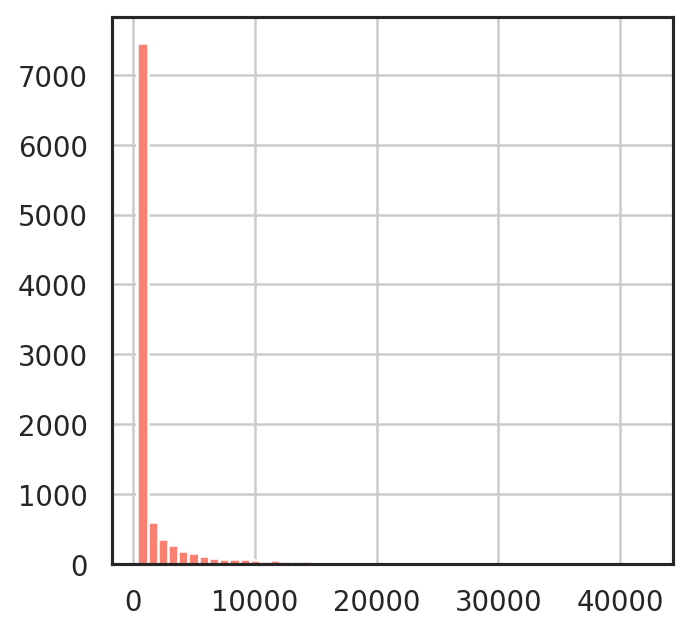

In [72]:
dat_C.obs["total_counts"].hist(bins = 50, color ='salmon')

<Axes: >

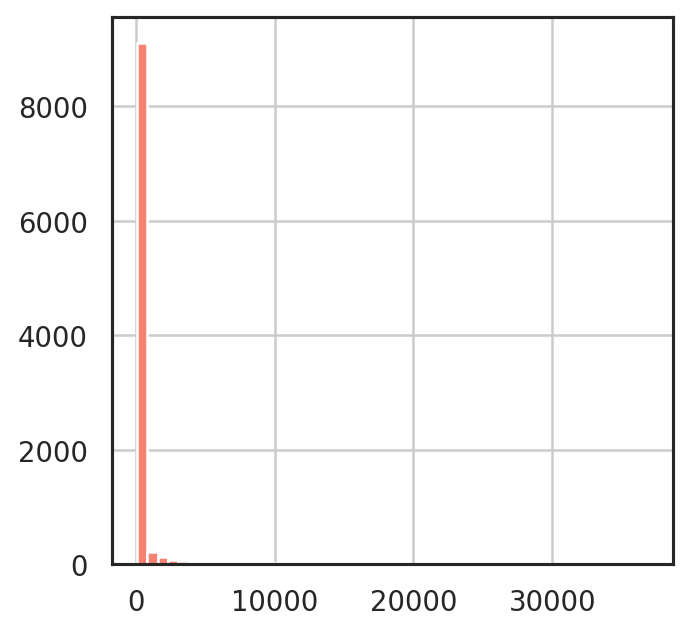

In [ ]:
dat.obs["total_counts"].hist(bins = 50, color ='salmon')

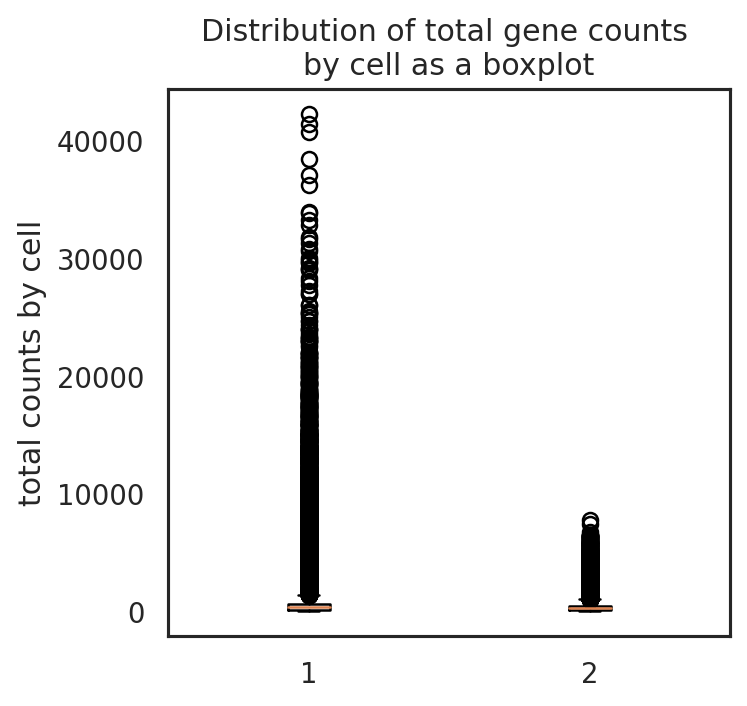

In [103]:
p = plt.boxplot( dat_AC.obs[ ['total_counts', 'n_genes_by_counts']]  )
plt.ylabel( "total counts by cell")
plt.title( "Distribution of total gene counts \nby cell as a boxplot")
plt.show()

In [77]:
dat_A.obs[['total_counts', 'n_genes_by_counts' ]].describe()

total_counts  n_genes_by_counts
count  10000.000000        10000.00000
mean     475.315308          252.16690
std     1537.685059          487.03202
min       43.000000           22.00000
25%       79.000000           64.00000
50%      163.000000          122.00000
75%      353.250000          251.00000
max    31658.000000         6488.00000

In [78]:
dat_C.obs[['total_counts', 'n_genes_by_counts' ]].describe()

total_counts  n_genes_by_counts
count  10000.000000       10000.000000
mean    1937.904785         882.510000
std     3664.437012        1003.733036
min      366.000000         194.000000
25%      447.000000         356.000000
50%      573.000000         443.000000
75%     1240.000000         825.250000
max    42280.000000        7795.000000

In [102]:
dat_AC = dat_A.concatenate(dat_C)



<ipython-input-102-fd6cd77013c9>:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  dat_AC = dat_A.concatenate(dat_C)


In [104]:
dat_AC.obs[['total_counts', 'n_genes_by_counts', 'pct_counts_Mitochondrial' ]].describe()

total_counts  n_genes_by_counts  pct_counts_Mitochondrial
count  20000.000000       20000.000000                   20000.0
mean    1206.610229         567.338450                       0.0
std     2903.584717         849.498118                       0.0
min       43.000000          22.000000                       0.0
25%      163.000000         122.000000                       0.0
50%      427.000000         332.000000                       0.0
75%      671.000000         496.000000                       0.0
max    42280.000000        7795.000000                       0.0

In [105]:
dat_B.obs[['total_counts', 'n_genes_by_counts', 'pct_counts_Mitochondrial' ]].describe()

total_counts  n_genes_by_counts  pct_counts_Mitochondrial
count   10000.00000         10000.0000                   10000.0
mean     1192.02356           659.5196                       0.0
std      2238.16626           724.8123                       0.0
min       246.00000            95.0000                       0.0
25%       365.75000           294.0000                       0.0
50%       519.00000           400.0000                       0.0
75%       939.00000           656.0000                       0.0
max     48748.00000          7820.0000                       0.0

In [87]:
import anndata as ad

dat_AC_new = ad.concat([dat_A, dat_C], merge="same")

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [88]:
dat_AC_new.obs[['total_counts', 'n_genes_by_counts' ]].describe()

total_counts  n_genes_by_counts
count  20000.000000       20000.000000
mean    1206.610229         567.338450
std     2903.584717         849.498118
min       43.000000          22.000000
25%      163.000000         122.000000
50%      427.000000         332.000000
75%      671.000000         496.000000
max    42280.000000        7795.000000

## Basic QC steps from scanpy and show the stat summary

In [106]:
dat_AC2 = dat_AC.copy()
dat_B2 = dat_B.copy()


In [107]:
sc.pp.filter_cells(dat_AC2, min_genes=200)
sc.pp.filter_genes(dat_AC2, min_cells=3)

sc.pp.filter_cells(dat_B2, min_genes=200)
sc.pp.filter_genes(dat_B2, min_cells=3)

In [108]:
dat_AC2 = dat_AC2[dat_AC2.obs.n_genes_by_counts < 2500, :] # remove potential doublets ( droplets that captures 2 (>1) cells)
dat_AC2 = dat_AC2[dat_AC2.obs.pct_counts_Mitochondrial < 5, :] #remove cells with high mitochondrial percentage

dat_B2 = dat_B2[dat_B2.obs.n_genes_by_counts < 2500, :] # remove potential doublets ( droplets that captures 2 (>1) cells)
dat_B2 = dat_B2[dat_B2.obs.pct_counts_Mitochondrial < 5, :] #remove cells with high mitochondrial percentage

In [110]:
dat_AC2.n_obs # check how many cells left


12261

In [111]:
dat_B2.n_obs # check how many cells left

9582

In [114]:
dat_AC2.obs[['total_counts', 'n_genes_by_counts', 'pct_counts_Mitochondrial' ]].describe()

total_counts  n_genes_by_counts  pct_counts_Mitochondrial
count  12261.000000       12261.000000                   12261.0
mean     937.381836         578.313678                       0.0
std     1071.050171         455.690260                       0.0
min      227.000000         200.000000                       0.0
25%      421.000000         328.000000                       0.0
50%      523.000000         399.000000                       0.0
75%      815.000000         580.000000                       0.0
max     9161.000000        2499.000000                       0.0

In [115]:
dat_B2.obs[['total_counts', 'n_genes_by_counts', 'pct_counts_Mitochondrial' ]].describe()

total_counts  n_genes_by_counts  pct_counts_Mitochondrial
count   9582.000000        9582.000000                    9582.0
mean     838.627930         549.640785                       0.0
std      899.940918         425.709413                       0.0
min      246.000000         200.000000                       0.0
25%      361.000000         292.000000                       0.0
50%      507.000000         393.000000                       0.0
75%      842.000000         602.000000                       0.0
max     7594.000000        2496.000000                       0.0

In [119]:
dat_AC2

View of AnnData object with n_obs × n_vars = 12261 × 17281
    obs: 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'batch', 'n_genes'
    var: 'Mitochondrial', 'mito', 'ambient', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells'
    layers: 'raw_counts'

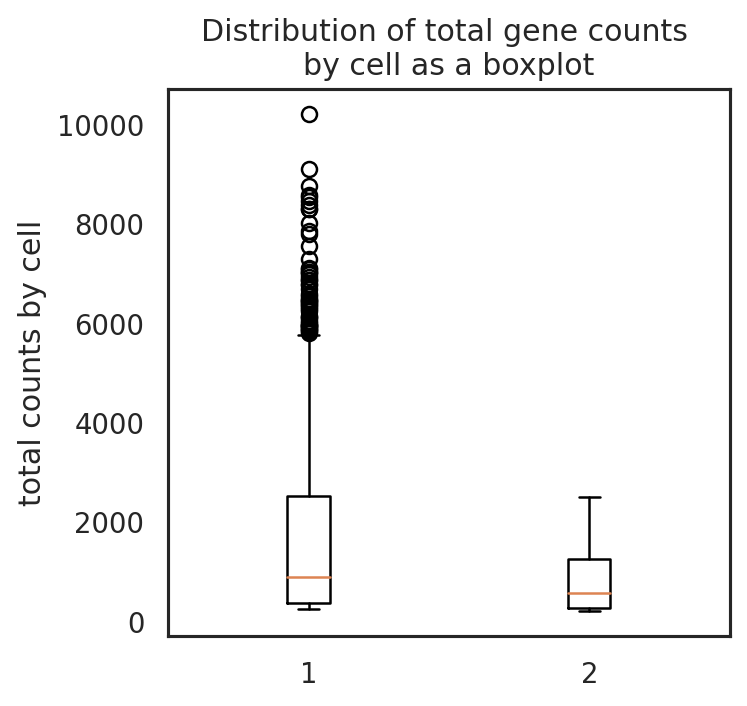

In [ ]:
p = plt.boxplot( dat2.obs[ ['total_counts', 'n_genes_by_counts']]  )
plt.ylabel( "total counts by cell")
plt.title( "Distribution of total gene counts \nby cell as a boxplot")
plt.show()

## try initial filter with dropkick and show the stat summary

Ignoring 6 barcodes with less than 50 genes detected
Ignoring 245 genes with zero total counts
Top 10 ambient genes have dropout rates between 6.734 and 36.832 percent:
	['mt-Cytb', 'Mptx1', 'mt-Nd4', 'Muc2', 'Clca1', 'mt-Nd1', 'Sprr2a2', 'mt-Co1', 'Car1', 'Trim30a']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 7343 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   34.8s finished
/usr/local/lib/python3.11/dist-packages/dropkick/api.py:623: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adata.obs.dropkick_score.fillna(0, inplace=True)  # fill ignored cells with zeros
/usr/local/lib/python3.11/dist-packages/dropkick/api.py:630: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Th

Chosen lambda value:
	[0.08938134]
Assigning scores and labels
Done!

Calculating QC Metrics


/content/./AmbiQuant/QCPipe_dir/qc_utils.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  secant_coef=data_cumsum[adata_in.obs.shape[0]-1]/adata_in.obs.shape[0]
/content/./AmbiQuant/QCPipe_dir/qc_utils.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inflection_percentiles_inds = np.percentile(x_vals[x_vals>inflection_points[0]],inflection_percentiles).astype(int)
<ipython-input-32-f1c30b250632>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

Inflection point at [ 970 2324 3678] for [0, 15, 30] percentiles of greatest secant distances


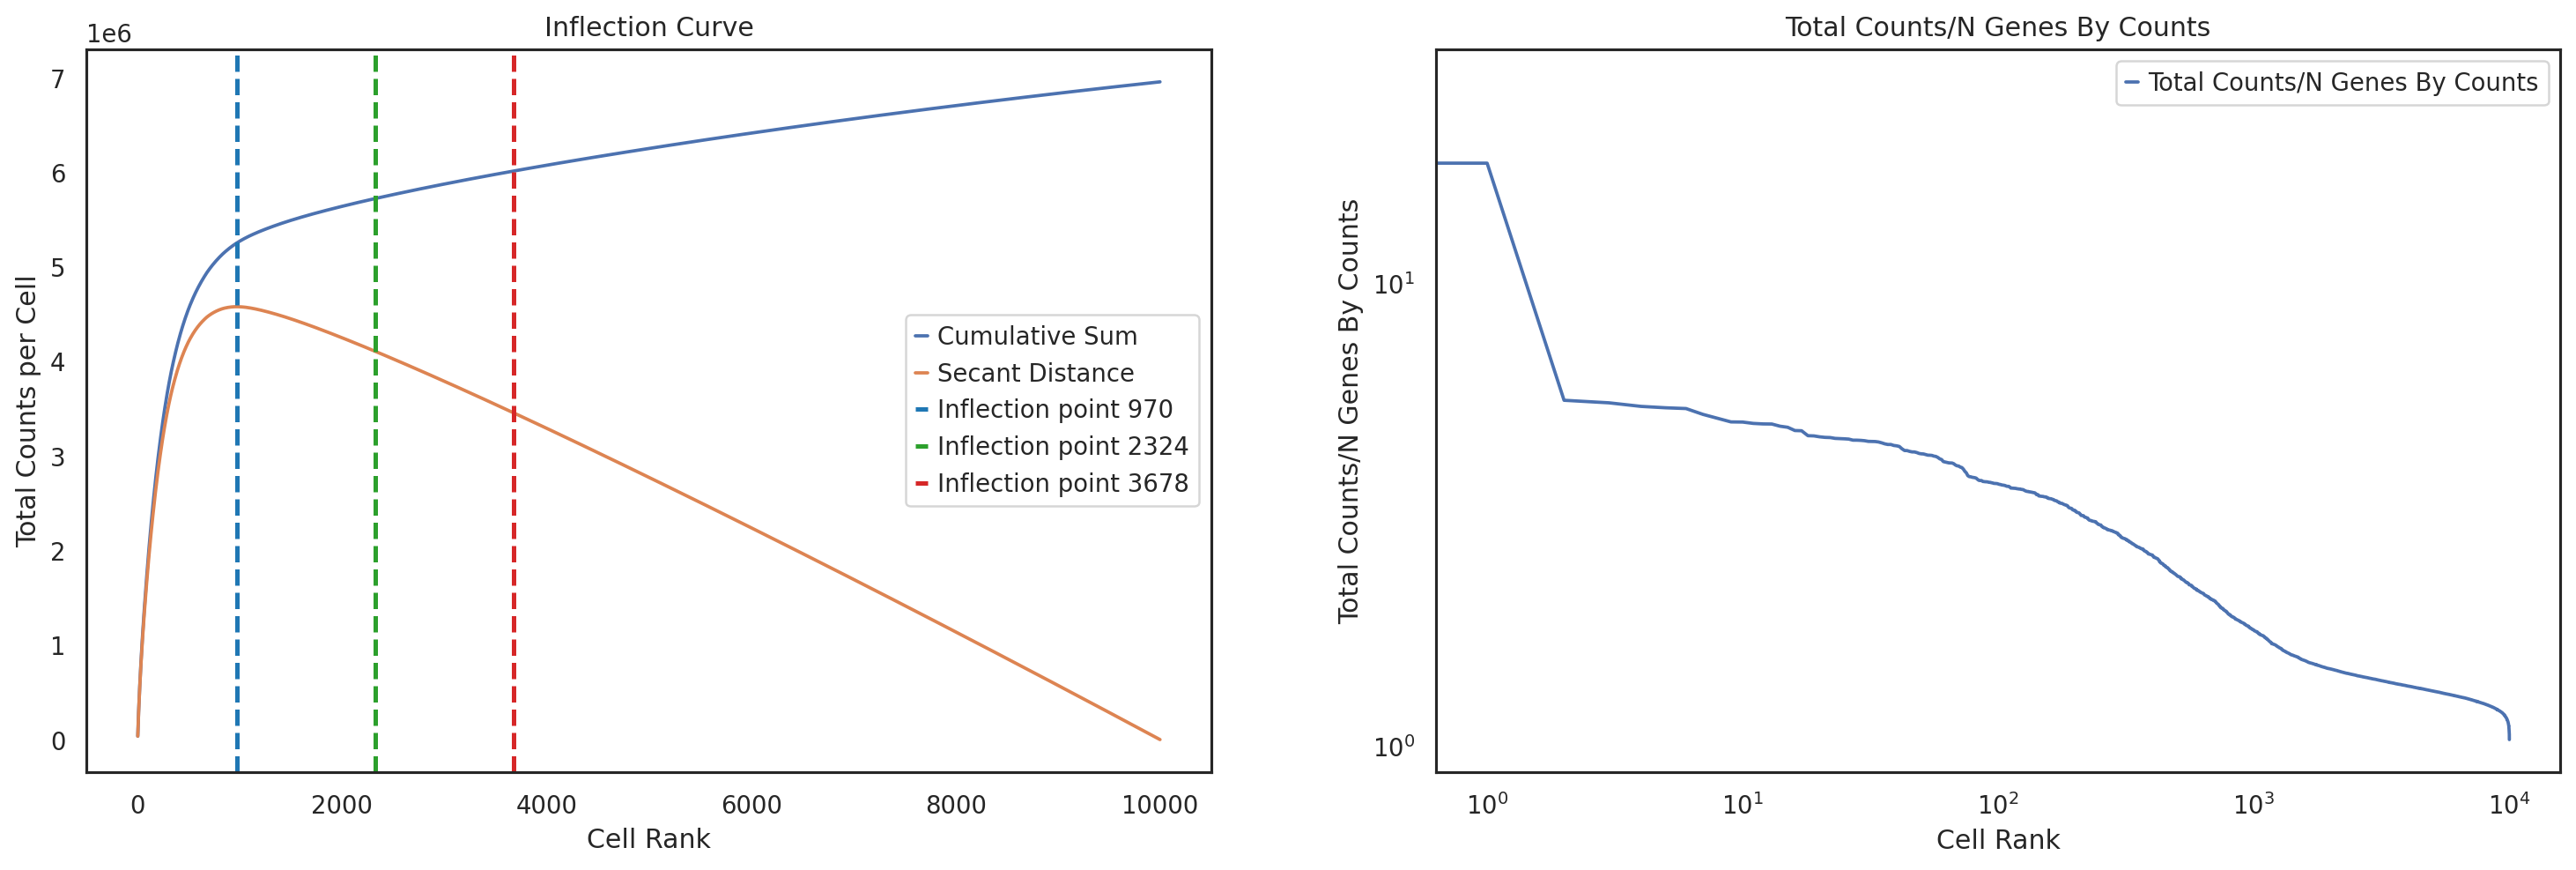

In [ ]:
dk.dropkick(dat)
dat.obs['dropkick_label']= dat.obs['dropkick_label'].astype(str)
inf = QCPipe.qc.find_inflection(dat)
sc.pp.filter_cells(dat,min_counts=dat[inf[0]].obs.total_counts[0])
dat.raw = dat.copy()

In [ ]:
dat = dat[dat.obs['dropkick_label'] == 'True'] # keep the cells with True dropkick label

In [ ]:
dat.n_obs # check how many cells left

419

In [ ]:
dat.obs[['total_counts', 'n_genes_by_counts' ]].describe()

total_counts  n_genes_by_counts
count    419.000000         419.000000
mean    7146.071777        2326.978520
std     6392.797363        1390.802896
min      697.000000         379.000000
25%     2232.500000        1132.500000
50%     4987.000000        2046.000000
75%    10631.000000        3296.500000
max    36886.000000        6854.000000

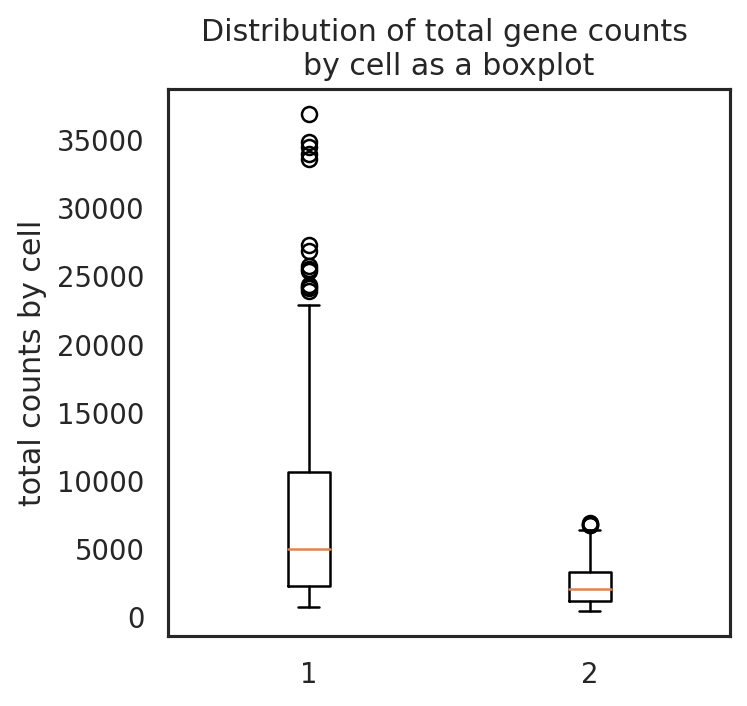

In [ ]:
p = plt.boxplot( dat.obs[ ['total_counts', 'n_genes_by_counts']]  )
plt.ylabel( "total counts by cell")
plt.title( "Distribution of total gene counts \nby cell as a boxplot")
plt.show()

## Working with Filtered Data

In [ ]:
#%cd /content/ #change back to the home directory

! curl -O -J -L https://www.dropbox.com/s/tvn3s1413julpjs/YX1_7017_cells.h5ad?dl=0
#download the filtered dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    65    0    65    0     0    289      0 --:--:-- --:--:-- --:--:--   290
100   318  100   318    0     0    366      0 --:--:-- --:--:-- --:--:--     0
100   491    0   491    0     0    256      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
curl: (23) Failed writing header


In [ ]:
filtered_dat = sc.read("./YX1_7017_cells.h5ad")

In [ ]:
filtered_dat

AnnData object with n_obs × n_vars = 783 × 18894
    obs: 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'n_genes_by_counts_zscore', 'relative_transcript_diversity_threshold', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'n_counts', 'leiden', 'Cell_Selection'
    var: 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'dropkick_coef', 'mean', 'std'
    uns: 'Order', 'dropkick_args', 'dropkick_label_colors', 'dropkick_thresholds', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
standard_qc_metrics =  ['total_counts', 'n_genes_by_counts',"pct_counts_in_top_200_genes", 'pct_counts_Mitochondrial', "dropkick_score" , 'leiden']

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


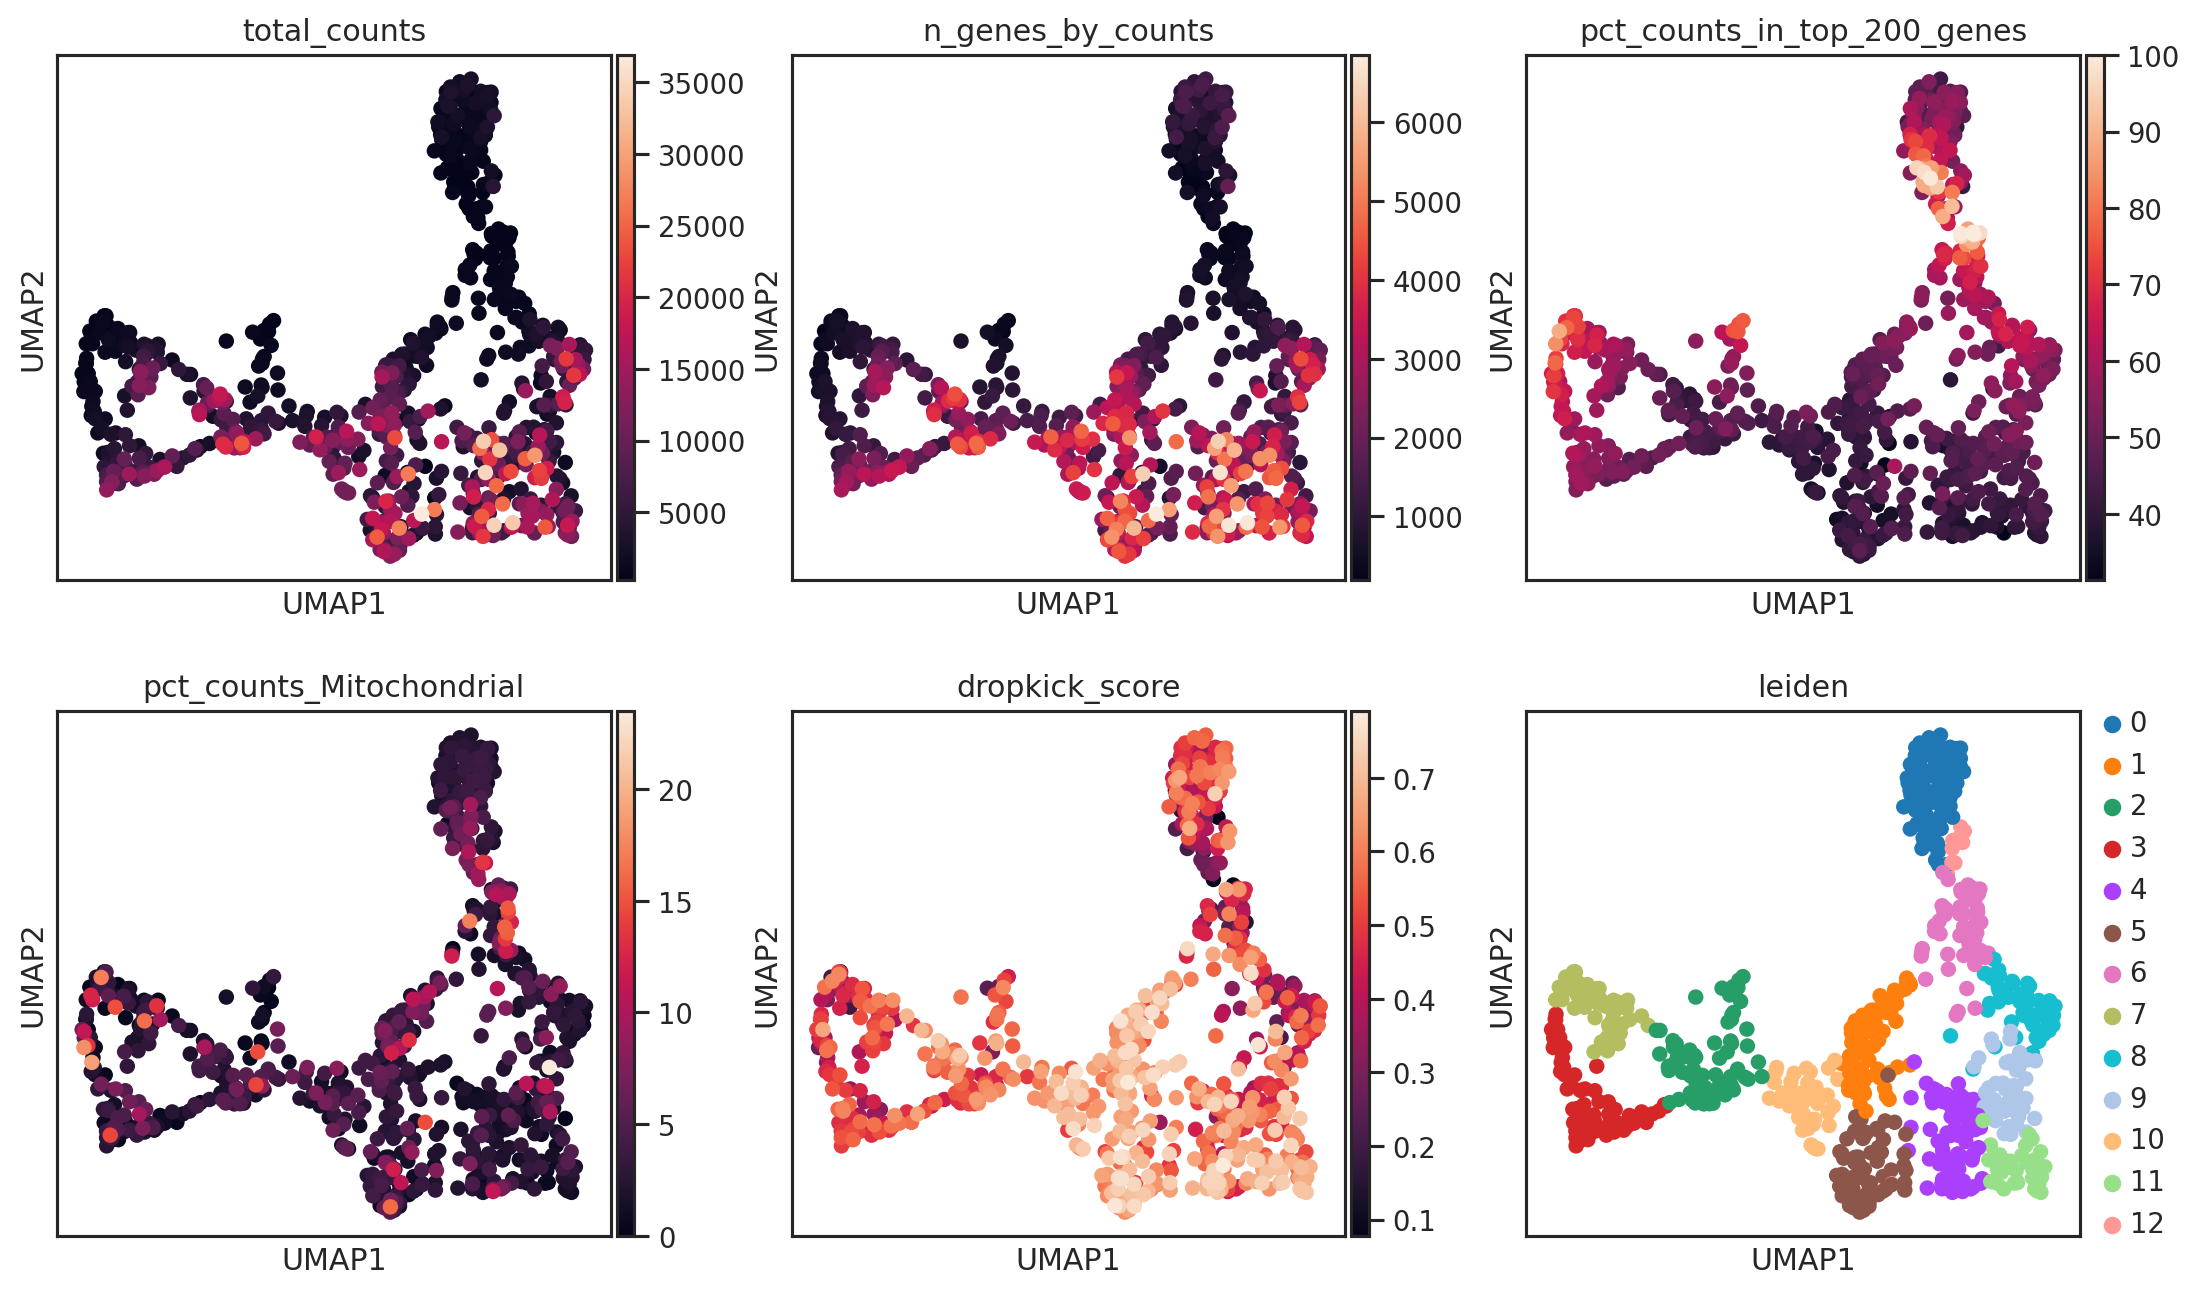

In [ ]:
sc.pl.umap(filtered_dat, color = standard_qc_metrics, ncols=3)

In [ ]:
ne_markers = ['Cd8a',  'Cd4', 'Jchain', 'Col1a1'] # Non-epithelial cell markers

In [ ]:
markers = ['Guca2a',  'Lgr5', 'Mki67',  'Muc2', 'Chga', 'Dclk1'] # epithelial cell type markers

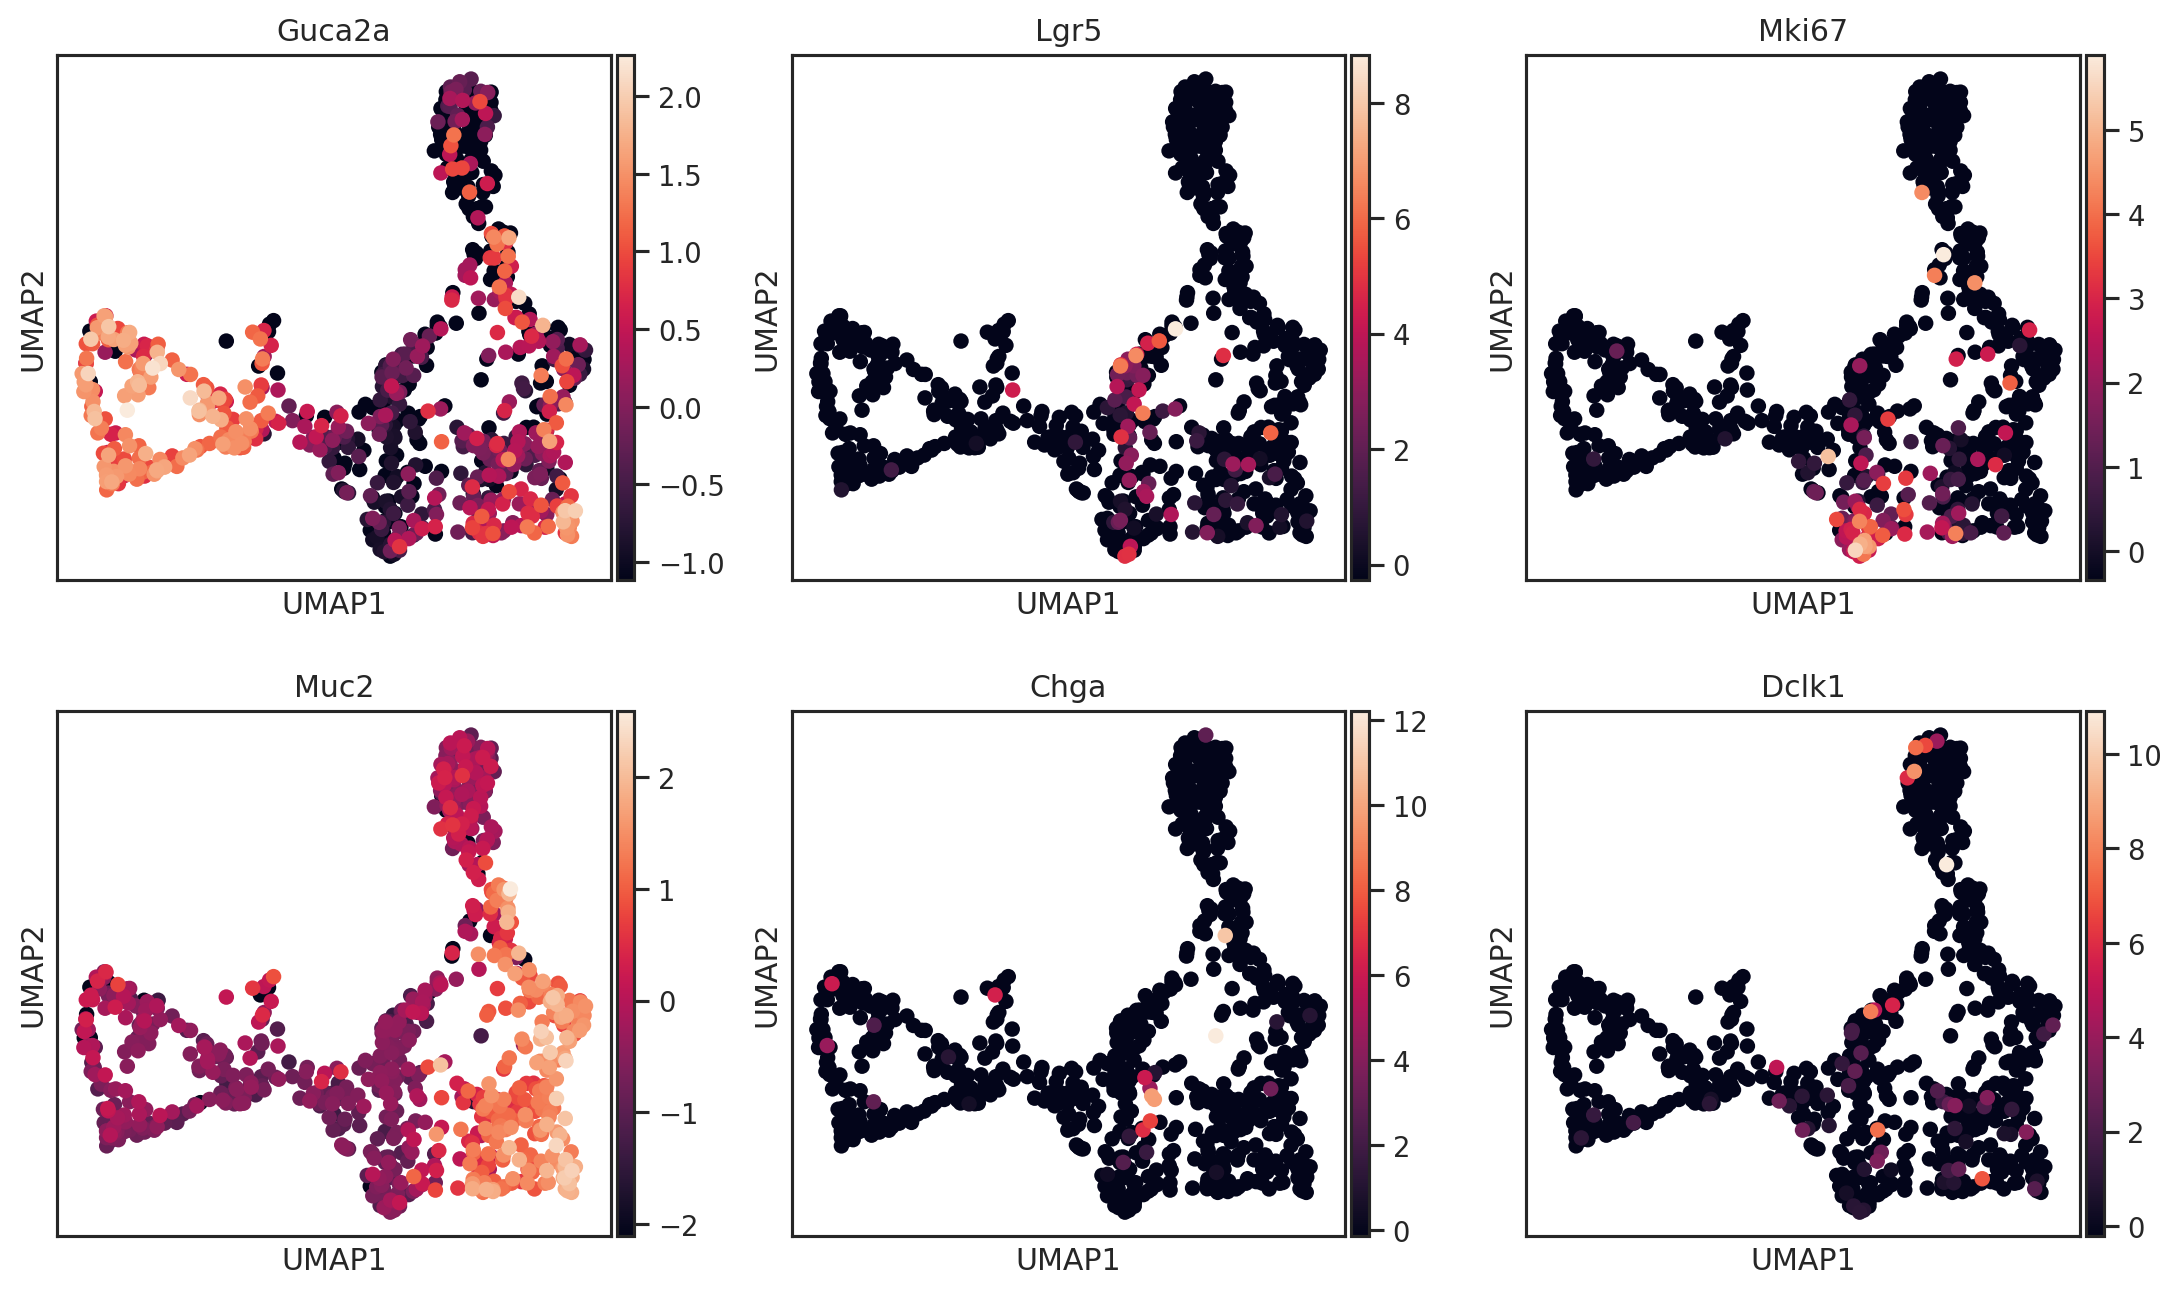

In [ ]:
sc.pl.umap(filtered_dat, color = markers, ncols=3, use_raw= False)

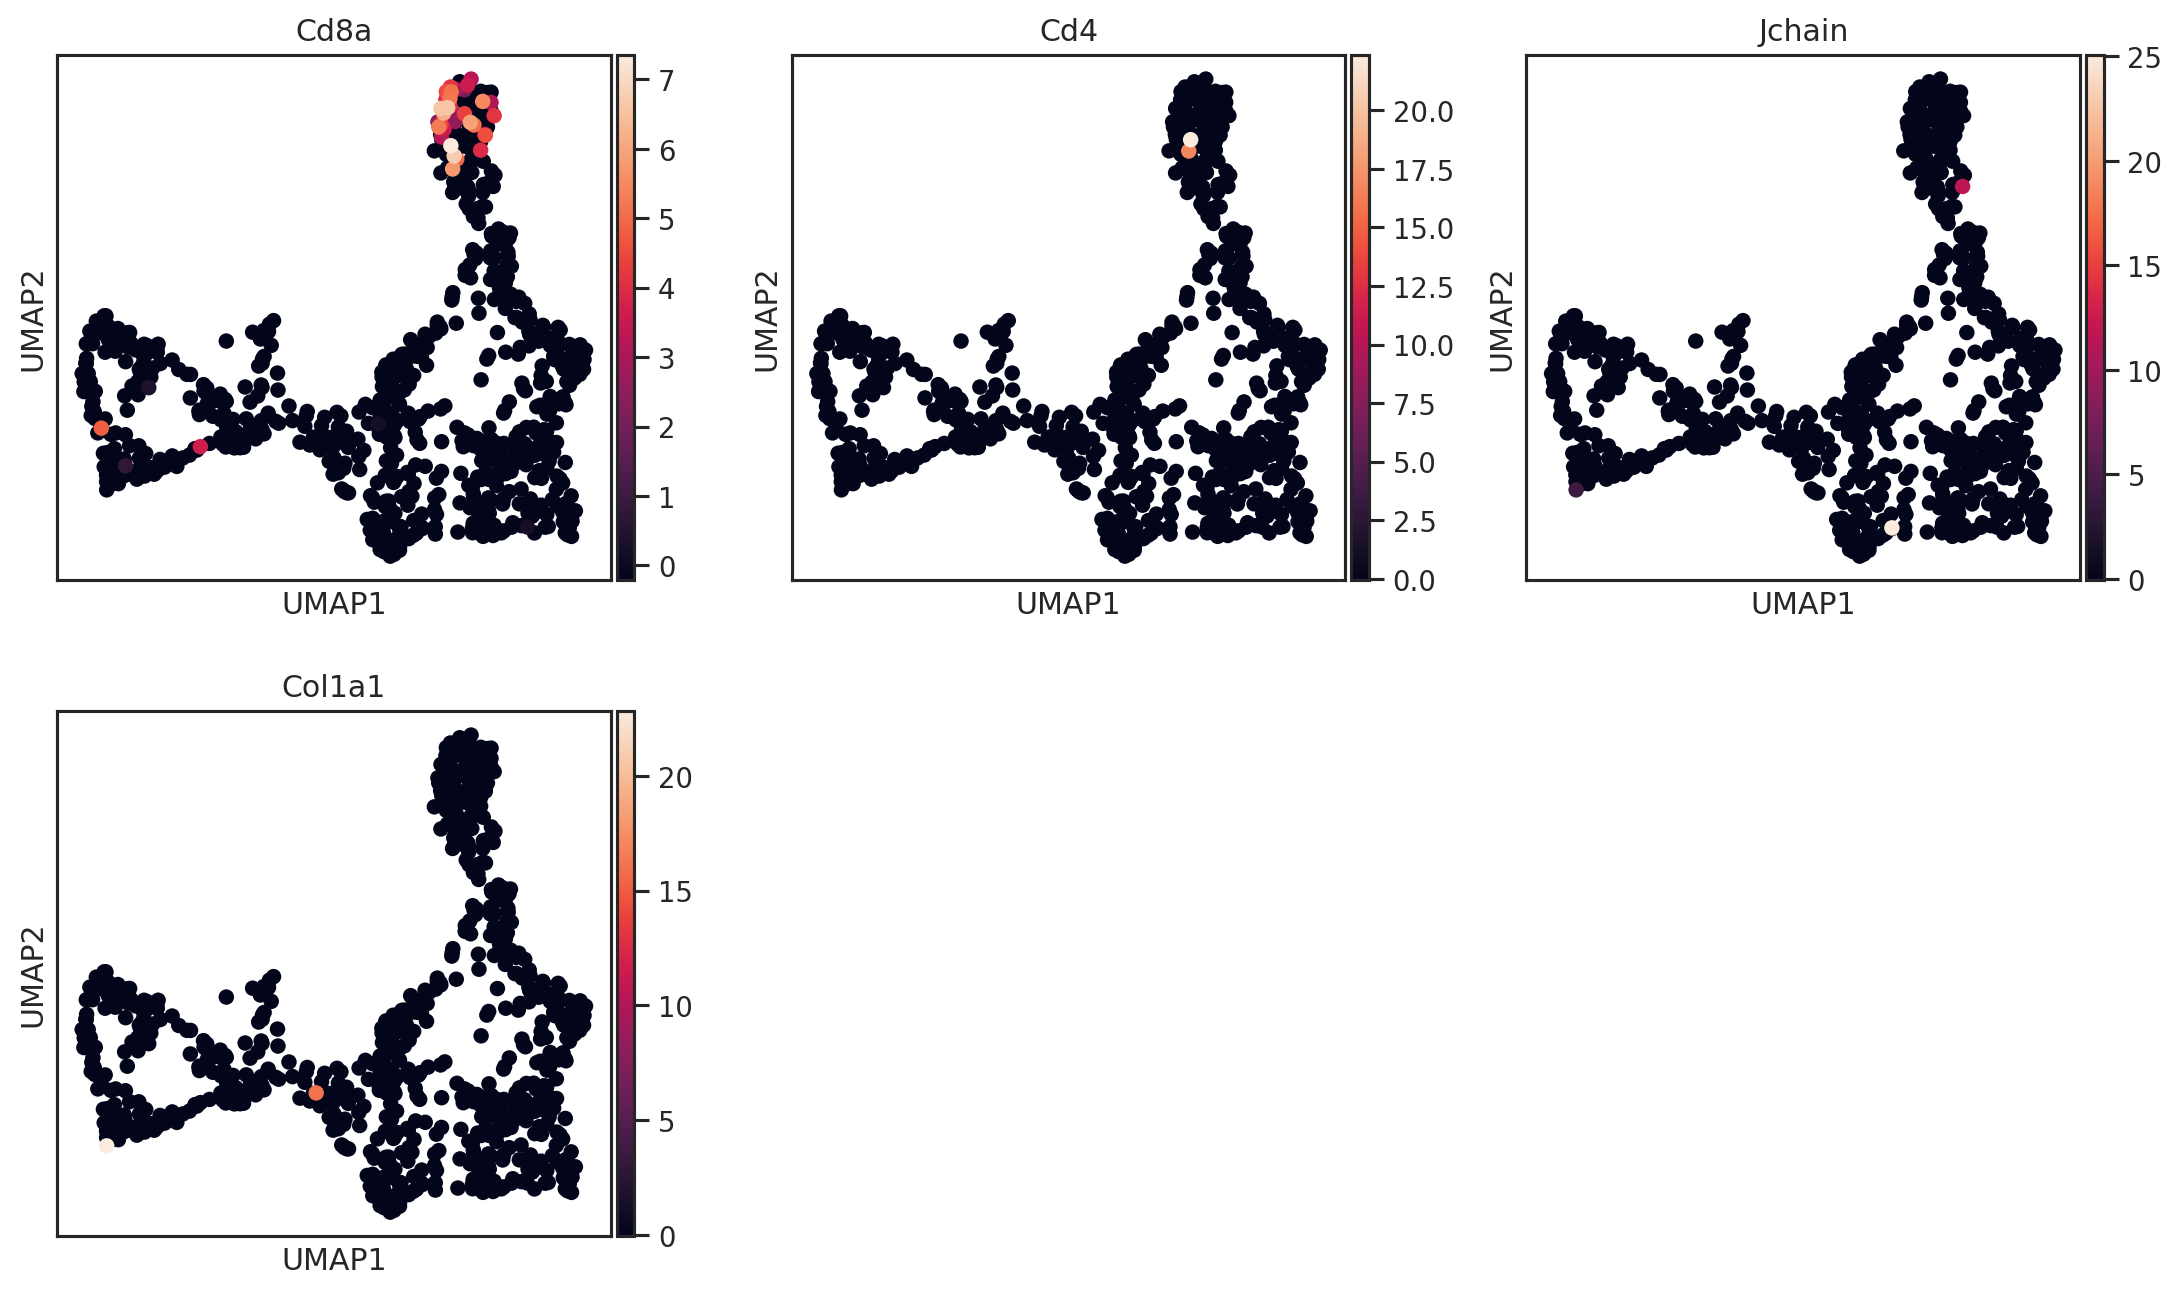

In [ ]:
sc.pl.umap(filtered_dat, color = ne_markers, ncols=3, use_raw= False)